<h2>CVC ClinicDB</h2>

In [ ]:
data_cd = pd.read_csv("/kaggle/input/cvcclinicdb/class_dict.csv")
data_cd.head()

,class_names,r,g,b
0,background,0,0,0
1,polyp,255,255,255


In [ ]:
metadata = pd.read_csv("/kaggle/input/cvcclinicdb/metadata.csv")
metadata.head()

,frame_id,sequence_id,tif_image_path,tif_mask_path,png_image_path,png_mask_path
0,1,1,TIFF/Original/1.tif,TIFF/Ground Truth/1.tif,PNG/Original/1.png,PNG/Ground Truth/1.png
1,10,1,TIFF/Original/10.tif,TIFF/Ground Truth/10.tif,PNG/Original/10.png,PNG/Ground Truth/10.png
2,100,5,TIFF/Original/100.tif,TIFF/Ground Truth/100.tif,PNG/Original/100.png,PNG/Ground Truth/100.png
3,101,5,TIFF/Original/101.tif,TIFF/Ground Truth/101.tif,PNG/Original/101.png,PNG/Ground Truth/101.png
4,102,5,TIFF/Original/102.tif,TIFF/Ground Truth/102.tif,PNG/Original/102.png,PNG/Ground Truth/102.png


In [ ]:
metadata.shape

(612, 6)

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   frame_id        612 non-null    int64 
 1   sequence_id     612 non-null    int64 
 2   tif_image_path  612 non-null    object
 3   tif_mask_path   612 non-null    object
 4   png_image_path  612 non-null    object
 5   png_mask_path   612 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.8+ KB


In [ ]:
metadata.describe()

,frame_id,sequence_id
count,612.000000,612.000000
mean,306.500000,14.939542
std,176.813461,8.403565
min,1.000000,1.000000
25%,153.750000,8.000000
50%,306.500000,15.000000
75%,459.250000,22.000000
max,612.000000,29.000000


In [ ]:
metadata.isnull().sum()

frame_id          0
sequence_id       0
tif_image_path    0
tif_mask_path     0
png_image_path    0
png_mask_path     0
dtype: int64

In [ ]:
# Distribution of frame IDs
print(metadata['frame_id'].value_counts())

# Distribution of sequence IDs
print(metadata['sequence_id'].value_counts())

frame_id
99     1
1      1
10     1
100    1
63     1
      ..
105    1
106    1
107    1
108    1
109    1
Name: count, Length: 612, dtype: int64
sequence_id
8     26
1     25
5     25
7     25
12    25
2     25
13    25
19    25
27    25
24    25
25    25
16    25
6     23
9     22
11    22
17    21
29    21
28    20
15    20
14    20
18    20
20    20
21    19
22    19
26    18
3     17
23    12
4     11
10     6
Name: count, dtype: int64


In [ ]:
print(metadata.loc[0, 'png_image_path'])

import os

image_path = metadata.loc[0, 'png_image_path']
print(os.path.exists(image_path))  # Should return True if the file exists

PNG/Original/1.png
False


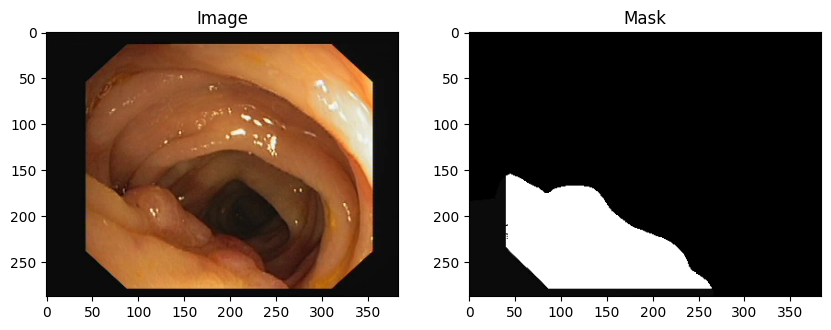

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to display an image and its mask
def display_image_and_mask(image_path, mask_path):
    image = cv2.imread("/kaggle/input/cvcclinicdb/"+image_path)
    mask = cv2.imread("/kaggle/input/cvcclinicdb/"+mask_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.show()

# Display the first image and its mask using correct column names
display_image_and_mask(metadata.loc[0, 'png_image_path'], metadata.loc[0, 'png_mask_path'])

In [ ]:
from PIL import Image
import numpy as np

# Function to get image statistics
def get_image_statistics(image_path):
    with Image.open("/kaggle/input/cvcclinicdb/"+image_path) as img:
        image_array = np.array(img)
        return img.size, np.mean(image_array), np.std(image_array)

# Example for the first image
image_stats = get_image_statistics(metadata.loc[0, 'png_image_path'])
print(f"Image Size: {image_stats[0]}, Mean Pixel Value: {image_stats[1]}, Std Dev: {image_stats[2]}")

Image Size: (384, 288), Mean Pixel Value: 73.07978575906635, Std Dev: 63.96217558881658


In [ ]:
base_dir = '/kaggle/input/cvcclinicdb/'

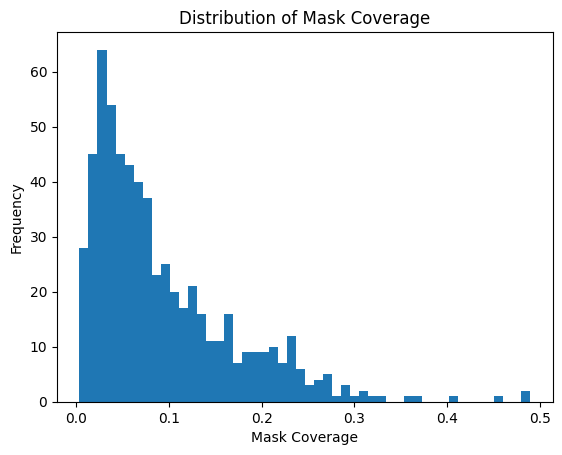

In [ ]:
import numpy as np
import cv2

# Function to calculate mask coverage
def mask_coverage(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Failed to load mask: {mask_path}")
        return None
    return np.sum(mask > 0) / mask.size

# Calculate coverage for all masks
metadata['mask_coverage'] = metadata['png_mask_path'].apply(
    lambda x: mask_coverage(os.path.join(base_dir, x))
)

# Plot the distribution of mask coverage
import matplotlib.pyplot as plt

plt.hist(metadata['mask_coverage'].dropna(), bins=50)
plt.title('Distribution of Mask Coverage')
plt.xlabel('Mask Coverage')
plt.ylabel('Frequency')
plt.show()

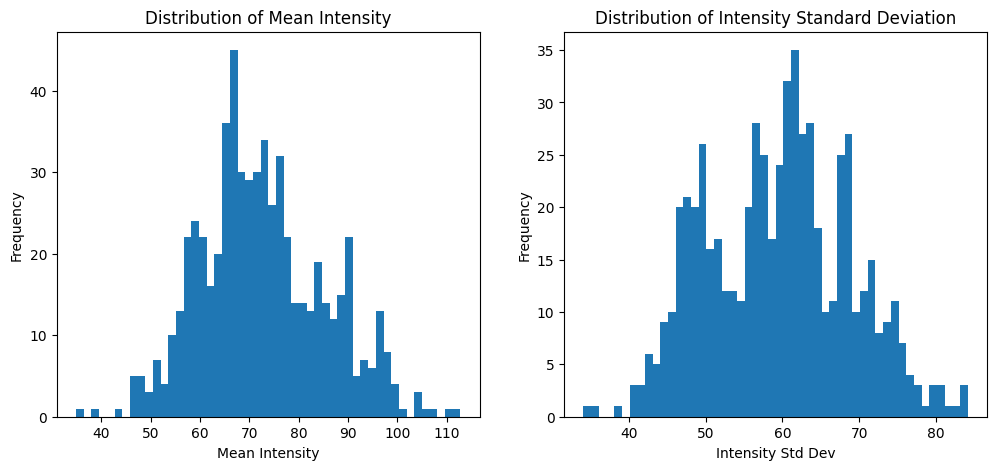

In [ ]:
from PIL import Image
import numpy as np

# Function to get image statistics
def get_image_statistics(image_path):
    with Image.open(image_path) as img:
        image_array = np.array(img)
        return np.mean(image_array), np.std(image_array)

# Calculate statistics for all images
metadata[['mean_intensity', 'std_intensity']] = metadata['png_image_path'].apply(
    lambda x: pd.Series(get_image_statistics(os.path.join(base_dir, x)))
)

# Plot the distribution of mean and standard deviation of pixel intensities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(metadata['mean_intensity'], bins=50)
plt.title('Distribution of Mean Intensity')
plt.xlabel('Mean Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(metadata['std_intensity'], bins=50)
plt.title('Distribution of Intensity Standard Deviation')
plt.xlabel('Intensity Std Dev')
plt.ylabel('Frequency')

plt.show()

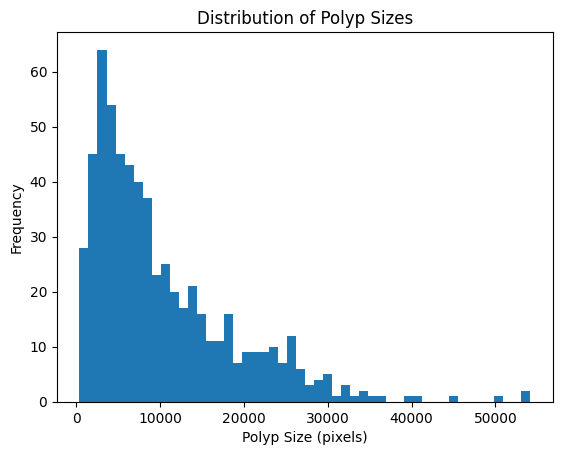

In [ ]:
# Function to calculate the area of polyps in the mask
def calculate_polyp_size(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Failed to load mask: {mask_path}")
        return None
    return np.sum(mask > 0)

# Calculate the polyp size for all masks
metadata['polyp_size'] = metadata['png_mask_path'].apply(
    lambda x: calculate_polyp_size(os.path.join(base_dir, x))
)

# Plot the distribution of polyp sizes
plt.hist(metadata['polyp_size'].dropna(), bins=50)
plt.title('Distribution of Polyp Sizes')
plt.xlabel('Polyp Size (pixels)')
plt.ylabel('Frequency')
plt.show()

<h2>Kvasir-SEG</h2>

Total Images: 1000
Total Masks: 1000
Image Dimensions: (529, 622, 3)
Mask Dimensions: (529, 622)


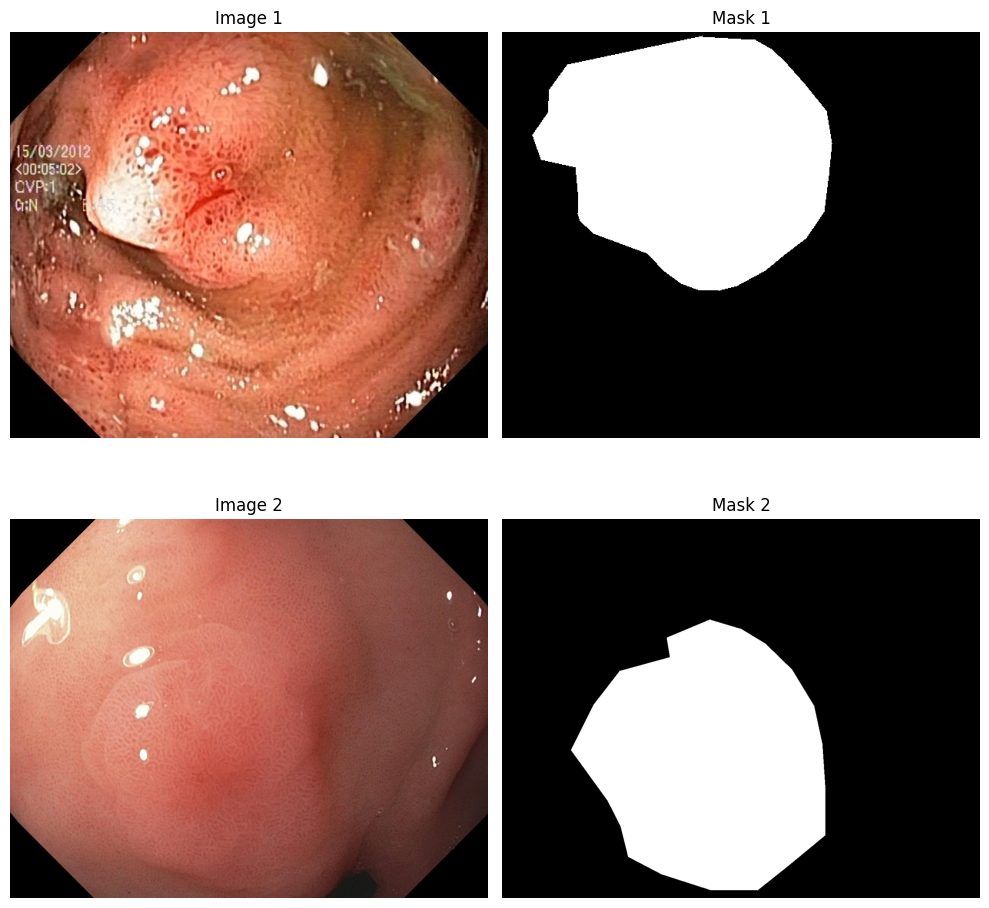

Unique Image Sizes: {(522, 621), (449, 469), (530, 561), (530, 570), (503, 616), (458, 474), (530, 588), (527, 564), (531, 571), (531, 580), (529, 619), (528, 510), (528, 528), (474, 557), (547, 627), (529, 502), (475, 620), (530, 556), (530, 565), (530, 574), (530, 583), (1010, 1220), (531, 548), (531, 557), (528, 622), (531, 566), (529, 605), (529, 614), (529, 623), (547, 622), (546, 568), (531, 525), (530, 569), (424, 560), (530, 578), (528, 608), (531, 552), (528, 617), (529, 591), (1012, 1224), (529, 600), (510, 605), (529, 618), (530, 443), (530, 537), (547, 617), (530, 546), (547, 626), (530, 564), (531, 529), (528, 603), (528, 612), (528, 621), (529, 613), (487, 332), (530, 541), (494, 618), (547, 621), (530, 559), (528, 598), (528, 607), (529, 572), (520, 603), (528, 616), (529, 581), (529, 590), (520, 621), (529, 608), (529, 437), (495, 569), (530, 536), (547, 616), (547, 625), (530, 554), (528, 602), (528, 611), (529, 594), (531, 613), (531, 622), (523, 370), (530, 504), (50

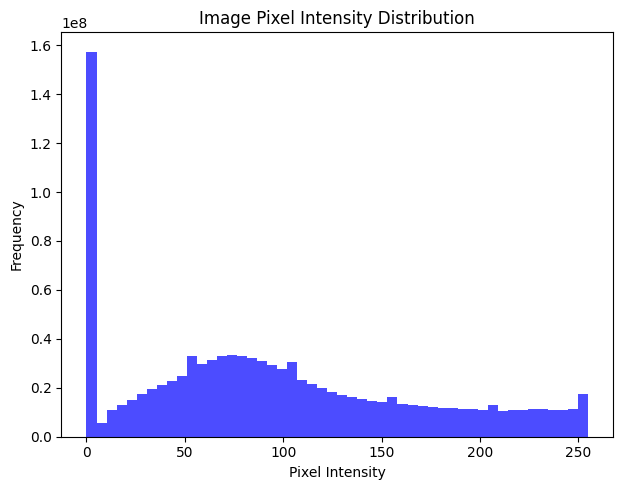

Average Mask Coverage: 15.78%
Median Mask Coverage: 11.76%


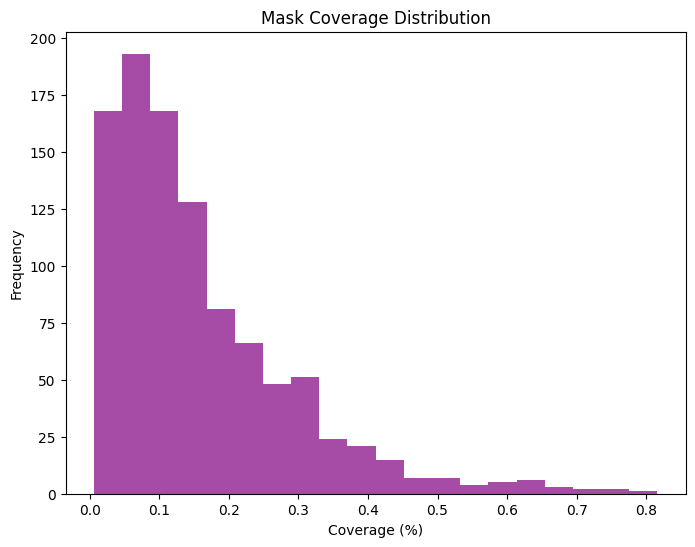

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define paths to images and masks
image_dir = "/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/images"  # Update with the actual path
mask_dir = "/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG/masks"   # Update with the actual path

# Helper function to load images
def load_images_from_directory(directory):
    images = []
    filenames = sorted(os.listdir(directory))  # Sort to match images and masks
    for filename in filenames:
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            image = np.array(Image.open(filepath))
            images.append(image)
    return images, filenames

# Load dataset
images, image_filenames = load_images_from_directory(image_dir)
masks, mask_filenames = load_images_from_directory(mask_dir)

# Basic EDA
print(f"Total Images: {len(images)}")
print(f"Total Masks: {len(masks)}")
print(f"Image Dimensions: {images[0].shape}")
print(f"Mask Dimensions: {masks[0].shape}")

# Display a few image-mask pairs
def display_image_mask_pairs(images, masks, num_samples=2):
    plt.figure(figsize=(10, 5 * num_samples))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(images[i])
        plt.title(f"Image {i + 1}")
        plt.axis("off")

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(masks[i], cmap='gray')
        plt.title(f"Mask {i + 1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

display_image_mask_pairs(images, masks)

# Check image and mask statistics
def dataset_statistics(images, masks):
    image_sizes = [img.shape[:2] for img in images]
    unique_sizes = set(image_sizes)
    print(f"Unique Image Sizes: {unique_sizes}")

    mask_sizes = [mask.shape[:2] for mask in masks]
    unique_mask_sizes = set(mask_sizes)
    print(f"Unique Mask Sizes: {unique_mask_sizes}")

    # Pixel intensity statistics
    image_pixel_values = np.concatenate([img.ravel() for img in images])
    mask_pixel_values = np.concatenate([mask.ravel() for mask in masks])

    print(f"Image Pixel Intensity Range: {image_pixel_values.min()} to {image_pixel_values.max()}")
    print(f"Mask Pixel Intensity Range: {mask_pixel_values.min()} to {mask_pixel_values.max()}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(image_pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title("Image Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

dataset_statistics(images, masks)

# Check mask overlap percentage
def calculate_mask_coverage(masks):
    coverages = []
    for mask in masks:
        coverage = np.sum(mask > 0) / mask.size
        coverages.append(coverage)
    return coverages

mask_coverages = calculate_mask_coverage(masks)
print(f"Average Mask Coverage: {np.mean(mask_coverages):.2%}")
print(f"Median Mask Coverage: {np.median(mask_coverages):.2%}")

# Plot mask coverage
plt.figure(figsize=(8, 6))
plt.hist(mask_coverages, bins=20, color='purple', alpha=0.7)
plt.title("Mask Coverage Distribution")
plt.xlabel("Coverage (%)")
plt.ylabel("Frequency")
plt.show()

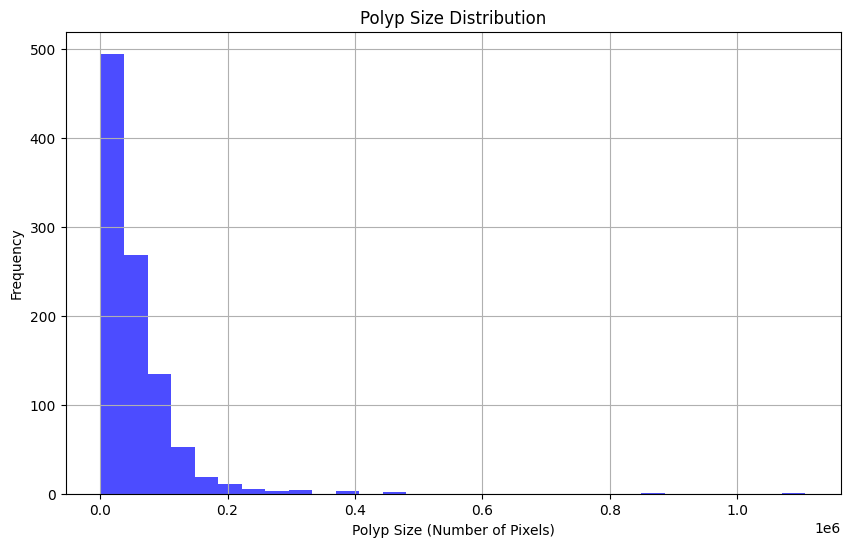

Total Masks: 1000
Average Polyp Size: 56380.60 pixels
Median Polyp Size: 39233.00 pixels
Minimum Polyp Size: 1196 pixels
Maximum Polyp Size: 1107159 pixels


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load mask files
def load_masks_from_directory(directory):
    masks = []
    filenames = sorted(os.listdir(directory))
    for filename in filenames:
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            mask = np.array(Image.open(filepath))
            masks.append(mask)
    return masks

# Load all masks
masks = load_masks_from_directory(mask_dir)

# Function to calculate polyp sizes
def calculate_polyp_sizes(masks):
    polyp_sizes = []
    for mask in masks:
        polyp_size = np.sum(mask > 0)  # Count non-zero pixels
        polyp_sizes.append(polyp_size)
    return polyp_sizes

# Calculate polyp sizes
polyp_sizes = calculate_polyp_sizes(masks)

# Plot polyp size distribution
def plot_polyp_size_distribution(polyp_sizes):
    plt.figure(figsize=(10, 6))
    plt.hist(polyp_sizes, bins=30, color="blue", alpha=0.7)
    plt.title("Polyp Size Distribution")
    plt.xlabel("Polyp Size (Number of Pixels)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_polyp_size_distribution(polyp_sizes)

# Print some basic statistics
print(f"Total Masks: {len(masks)}")
print(f"Average Polyp Size: {np.mean(polyp_sizes):.2f} pixels")
print(f"Median Polyp Size: {np.median(polyp_sizes):.2f} pixels")
print(f"Minimum Polyp Size: {np.min(polyp_sizes)} pixels")
print(f"Maximum Polyp Size: {np.max(polyp_sizes)} pixels")

<h2>TGA-Net</h2>

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
print(torch.version.cuda)  # CUDA version
print(torch.cuda.get_device_name(0))  # GPU name

12.1
Tesla T4


In [ ]:
x = torch.rand(3, 3).cuda()
print(x)

tensor([[0.8804, 0.7511, 0.9374],
        [0.4946, 0.5169, 0.2805],
        [0.8183, 0.8190, 0.7308]], device='cuda:0')


<h3>metrics</h3>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

""" Loss Functions -------------------------------------- """
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)

        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

        return 1 - dice

class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)

        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss

        return Dice_BCE

class MultiClassBCE(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super().__init__()

    def forward(self, inputs, targets, smooth=1):
        loss = []
        for i in range(inputs.shape[1]):
            yp = inputs[:, i]
            yt = targets[:, i]
            BCE = F.binary_cross_entropy(yp, yt, reduction='mean')

            if i == 0:
                loss = BCE
            else:
                loss += BCE

        return loss


""" Metrics ------------------------------------------ """
def precision(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    return (intersection + 1e-15) / (y_pred.sum() + 1e-15)

def recall(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    return (intersection + 1e-15) / (y_true.sum() + 1e-15)

def F2(y_true, y_pred, beta=2):
    p = precision(y_true,y_pred)
    r = recall(y_true, y_pred)
    return (1+beta**2.) *(p*r) / float(beta**2*p + r + 1e-15)

def dice_score(y_true, y_pred):
    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)

def jac_score(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    return (intersection + 1e-15) / (union + 1e-15)

In [ ]:
!pip install bpemb

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


<h3>text2embed</h3>

In [ ]:
import numpy as np
from bpemb import BPEmb

""" Subword Embeddings: https://nlp.h-its.org/bpemb """

class Text2Embed:
    def __init__(self):
        self.bpemb_en = BPEmb(lang="en", vs=100000, dim=300)

    def to_tokens(self, word):
        tokens = self.bpemb_en.encode(word)
        return tokens

    def to_embed(self, word, mean=True):
        embed = self.bpemb_en.embed(word)
        if mean == True and len(embed) > 1:
            embed = np.mean(embed, axis=0)
            embed = np.expand_dims(embed, axis=0)
        return embed

In [ ]:
# words = ["polyp", "instrument", "nuclei", "skin cancer", "neural structure"]
words = ["small", "medium", "large"]
embed = Text2Embed()

embed_vec = []
for word in words:
    tokens = embed.to_tokens(word)
    vec = embed.to_embed(word, mean=False)
    embed_vec.append(vec)

    print(f"Tokens: {tokens} - Vec: {vec.shape}")

embed_vec = np.array(embed_vec)
print(embed_vec.shape)

downloading https://nlp.h-its.org/bpemb/en/en.wiki.bpe.vs100000.model


100%|██████████| 1987533/1987533 [00:00<00:00, 2954991.48B/s]


downloading https://nlp.h-its.org/bpemb/en/en.wiki.bpe.vs100000.d300.w2v.bin.tar.gz


100%|██████████| 112159933/112159933 [00:04<00:00, 24606267.36B/s]


Tokens: ['▁small'] - Vec: (1, 300)
Tokens: ['▁medium'] - Vec: (1, 300)
Tokens: ['▁large'] - Vec: (1, 300)
(3, 1, 300)


In [ ]:
!pip install torch torchvision ptflops

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


<h3>resnet</h3>

In [ ]:
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained=False, progress=True, **kwargs):
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)


def resnet34(pretrained=False, progress=True, **kwargs):
    r"""ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet50(pretrained=True, progress=True, **kwargs):
    r"""ResNet-50 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet101(pretrained=False, progress=True, **kwargs):
    r"""ResNet-101 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet101', Bottleneck, [3, 4, 23, 3], pretrained, progress,
                   **kwargs)


def resnet152(pretrained=False, progress=True, **kwargs):
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)


def resnext50_32x4d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-50 32x4d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 4
    return _resnet('resnext50_32x4d', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def resnext101_32x8d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-101 32x8d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 8
    return _resnet('resnext101_32x8d', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def wide_resnet50_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-50-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_

    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet50_2', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def wide_resnet101_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-101-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_

    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet101_2', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)

<h2>VMAMBA</h2>

In [ ]:
import torchvision
print("TorchVision Version:", torchvision.__version__)

TorchVision Version: 0.19.1+cu121


In [ ]:
import torch
torch.__version__

'2.4.1+cu121'

In [ ]:
!pip install --upgrade mamba_ssm[causal-conv1d]==2.0.3 triton transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 MB 6.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 90.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.3 MB/s eta 0:00:00:00:01
  Created wheel for mamba_ssm: filename=mamba_ssm-2.0.3-cp310-cp310-linux_x86_64.whl size=324043579 sha256=65f5ab65ef237a453f95a91dcac015585e6dfaec436be7342d11711594b8ad8f
  Stored in directory: /root/.cache/pip/wheels/82/d4/ff/eca558dfdbd3cac3ac9d037ade7d8eb61e841d9b34f4342373
Successfully built mamba_ssm
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Suc

In [ ]:
from transformers import AutoModel
from PIL import Image
from timm.data.transforms_factory import create_transform
import requests

model = AutoModel.from_pretrained("nvidia/MambaVision-T-1K", trust_remote_code=True)

# eval mode for inference
model.cuda().eval()

# prepare image for the model
url = 'http://images.cocodataset.org/val2017/000000020247.jpg'
image = Image.open(requests.get(url, stream=True).raw)
input_resolution = (3, 224, 224)  # MambaVision supports any input resolutions

transform = create_transform(input_size=input_resolution,
                             is_training=False,
                             mean=model.config.mean,
                             std=model.config.std,
                             crop_mode=model.config.crop_mode,
                             crop_pct=model.config.crop_pct)
inputs = transform(image).unsqueeze(0).cuda()
# model inference
out_avg_pool, features = model(inputs)
print("Size of the averaged pool features:", out_avg_pool.size())  # torch.Size([1, 640])
print("Number of stages in extracted features:", len(features)) # 4 stages
print("Size of extracted features in stage 1:", features[0].size()) # torch.Size([1, 80, 56, 56])
print("Size of extracted features in stage 4:", features[3].size()) # torch.Size([1, 640, 7, 7])

config.json:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

configuration_mambavision.py:   0%|          | 0.00/625 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/MambaVision-T-1K:
- configuration_mambavision.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_mambavision.py:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/selective_scan_interface.py:164: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, xz, conv1d_weight, conv1d_bias, x_proj_weight, delta_proj_weight,
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/selective_scan_interface.py:240: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dout):
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/triton/layer_norm.py:959: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/triton/layer_norm.py:1018: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type=

model.safetensors:   0%|          | 0.00/127M [00:00<?, ?B/s]

Size of the averaged pool features: torch.Size([1, 640])
Number of stages in extracted features: 4
Size of extracted features in stage 1: torch.Size([1, 80, 56, 56])
Size of extracted features in stage 4: torch.Size([1, 640, 7, 7])


In [ ]:
x1,x2,x3,x4 = features
x1.shape,x2.shape,x3.shape,x4.shape

(torch.Size([1, 80, 56, 56]),
 torch.Size([1, 160, 28, 28]),
 torch.Size([1, 320, 14, 14]),
 torch.Size([1, 640, 7, 7]))

<h3>models</h3>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PDA(nn.Module):
    def __init__(self, in_channels, embed_dim, num_iterations=5, epsilon=1e-3, sigma=0.1):
        super(PDA, self).__init__()
        self.num_iterations = num_iterations
        self.epsilon = epsilon
        self.sigma = sigma

        # Linear projections for Query, Key, and Value
        self.q_proj = nn.Conv2d(in_channels, embed_dim, kernel_size=1)
        self.k_proj = nn.Conv2d(in_channels, embed_dim, kernel_size=1)
        self.v_proj = nn.Conv2d(in_channels, embed_dim, kernel_size=1)

        # Denoising UNet
        self.unet = DenoisingUNet(embed_dim)

        # Output projection to match FEM input channels
        self.out_proj = nn.Conv2d(embed_dim, in_channels, kernel_size=1)

    def forward(self, x):
        Q = self.q_proj(x)
        K = self.k_proj(x)
        V = self.v_proj(x)

        # Compute self-attention
        Z = F.softmax(Q @ K.transpose(-2, -1) / (K.shape[-1] ** 0.5), dim=-1) @ V
        Z_prev = torch.zeros_like(Z)

        # Iterative Refinement
        i = 0
        while i < self.num_iterations and torch.norm(Z - Z_prev) > self.epsilon:
            Z_prev = Z.clone()

            # Add Gaussian noise
            Q += torch.randn_like(Q) * self.sigma
            K += torch.randn_like(K) * self.sigma
            V += torch.randn_like(V) * self.sigma

            # Apply self-attention
            Z = F.softmax(Q @ K.transpose(-2, -1) / (K.shape[-1] ** 0.5), dim=-1) @ V

            # Apply Denoising UNet
            Z = F.softmax(self.unet(Z), dim=-1)

            i += 1

        return self.out_proj(Z)  # Ensure output matches FEM input channels



class DenoisingUNet(nn.Module):
    def __init__(self, channels):
        super(DenoisingUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(channels, channels // 2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(channels // 2, channels // 4, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(channels // 4, channels // 2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(channels // 2, channels, kernel_size=3, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class conv2d(nn.Module):
    def __init__(self, in_c, out_c, kernel_size=3, padding=1, dilation=1, act=True):
        super().__init__()
        self.act = act

        self.conv = nn.Sequential(
            nn.Conv2d(in_c, out_c, kernel_size, padding=padding, dilation=dilation, bias=False),
            nn.BatchNorm2d(out_c)
        )
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        if self.act == True:
            x = self.relu(x)
        return x

class channel_attention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(channel_attention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc1   = nn.Conv2d(in_planes, in_planes // 16, 1, bias=False)
        self.relu1 = nn.ReLU()
        self.fc2   = nn.Conv2d(in_planes // 16, in_planes, 1, bias=False)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x0 = x
        avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))
        max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
        out = avg_out + max_out
        return x0 * self.sigmoid(out)


class spatial_attention(nn.Module):
    def __init__(self, kernel_size=7):
        super(spatial_attention, self).__init__()

        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x0 = x
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return x0 * self.sigmoid(x)

class dilated_conv(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.relu = nn.ReLU(inplace=True)

        self.c1 = nn.Sequential(conv2d(in_c, out_c, kernel_size=1, padding=0), channel_attention(out_c))
        self.c2 = nn.Sequential(conv2d(in_c, out_c, kernel_size=(3, 3), padding=6, dilation=6), channel_attention(out_c))
        self.c3 = nn.Sequential(conv2d(in_c, out_c, kernel_size=(3, 3), padding=12, dilation=12), channel_attention(out_c))
        self.c4 = nn.Sequential(conv2d(in_c, out_c, kernel_size=(3, 3), padding=18, dilation=18), channel_attention(out_c))
        self.c5 = conv2d(out_c*4, out_c, kernel_size=3, padding=1, act=False)
        self.c6 = conv2d(in_c, out_c, kernel_size=1, padding=0, act=False)
        self.sa = spatial_attention()

    def forward(self, x):
        x1 = self.c1(x)
        x2 = self.c2(x)
        x3 = self.c3(x)
        x4 = self.c4(x)
        xc = torch.cat([x1, x2, x3, x4], axis=1)
        xc = self.c5(xc)
        xs = self.c6(x)
        x = self.relu(xc+xs)
        x = self.sa(x)
        return x

class label_attention(nn.Module):
    def __init__(self, in_c):
        super().__init__()
        self.relu = nn.ReLU(inplace=True)

        """ Channel Attention """
        self.c1 = nn.Sequential(
            nn.Conv2d(in_c[1], in_c[0], kernel_size=1, padding=0, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_c[0], in_c[0], kernel_size=1, padding=0, bias=False)
        )

    def forward(self, feats, label):
        """ Channel Attention """
        b, c = label.shape
        label = label.reshape(b, c, 1, 1)
        ch_attn = self.c1(label)
        ch_map = torch.sigmoid(ch_attn)
        feats = feats * ch_map

        ch_attn = ch_attn.reshape(ch_attn.shape[0], ch_attn.shape[1])
        return ch_attn, feats

class decoder_block(nn.Module):
    def __init__(self, in_c, out_c, scale=2):
        super().__init__()
        self.scale = scale
        self.relu = nn.ReLU(inplace=True)

        self.up = nn.Upsample(scale_factor=scale, mode="bilinear", align_corners=True)
        self.c1 = conv2d(in_c+out_c, out_c, kernel_size=1, padding=0)
        self.c2 = conv2d(out_c, out_c, act=False)
        self.c3 = conv2d(out_c, out_c, act=False)
        self.c4 = conv2d(out_c, out_c, kernel_size=1, padding=0, act=False)
        self.ca = channel_attention(out_c)
        self.sa = spatial_attention()

    def forward(self, x, skip):
        x = self.up(x)
        x = torch.cat([x, skip], axis=1)
        x = self.c1(x)

        s1 = x
        x = self.c2(x)
        x = self.relu(x+s1)

        s2 = x
        x = self.c3(x)
        x = self.relu(x+s2+s1)

        s3 = x
        x = self.c4(x)
        x = self.relu(x+s3+s2+s1)

        x = self.ca(x)
        x = self.sa(x)
        return x

class output_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.c1 = nn.Conv2d(in_c, out_c, kernel_size=1, padding=0)

    def forward(self, x):
        x = self.up(x)
        x = self.c1(x)
        return x

class text_classifier(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Sequential(
            nn.Linear(in_c, in_c//8, bias=False), nn.ReLU(),
            nn.Linear(in_c//8, out_c[0], bias=False)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(in_c, in_c//8, bias=False), nn.ReLU(),
            nn.Linear(in_c//8, out_c[1], bias=False)
        )

    def forward(self, feats):
        pool = self.avg_pool(feats).view(feats.shape[0], feats.shape[1])
        num_polyps = self.fc1(pool)
        polyp_sizes = self.fc2(pool)
        return num_polyps, polyp_sizes

class embedding_feature_fusion(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.fc = nn.Sequential(
            nn.Conv2d((in_c[0]+in_c[1])*in_c[2], out_c, 1, bias=False), nn.ReLU(),
            nn.Conv2d(out_c, out_c, 1, bias=False), nn.ReLU()
        )

    def forward(self, num_polyps, polyp_sizes, label):
        num_polyps_prob = torch.softmax(num_polyps, axis=1)
        polyp_sizes_prob = torch.softmax(polyp_sizes, axis=1)
        prob = torch.cat([num_polyps_prob, polyp_sizes_prob], axis=1)
        prob = prob.view(prob.shape[0], prob.shape[1], 1)
        x = label * prob
        x = x.view(x.shape[0], -1, 1, 1)
        x = self.fc(x)
        x = x.view(x.shape[0], -1)
        return x

class multiscale_feature_aggregation(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.relu = nn.ReLU(inplace=True)

        self.up_2x2 = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.up_4x4 = nn.Upsample(scale_factor=4, mode="bilinear", align_corners=True)

        self.c11 = conv2d(in_c[0], out_c, kernel_size=1, padding=0)
        self.c12 = conv2d(in_c[1], out_c, kernel_size=1, padding=0)
        self.c13 = conv2d(in_c[2], out_c, kernel_size=1, padding=0)
        self.c14 = conv2d(out_c*3, out_c, kernel_size=1, padding=0)

        self.c2 = conv2d(out_c, out_c, act=False)
        self.c3 = conv2d(out_c, out_c, act=False)

    def forward(self, x1, x2, x3):
        x1 = self.up_4x4(x1)
        x2 = self.up_2x2(x2)

        x1 = self.c11(x1)
        x2 = self.c12(x2)
        x3 = self.c13(x3)
        x = torch.cat([x1, x2, x3], axis=1)
        x = self.c14(x)

        s1 = x
        x = self.c2(x)
        x = self.relu(x+s1)

        s2 = x
        x = self.c3(x)
        x = self.relu(x+s2+s1)

        return x

# class TGAPolypSeg(nn.Module):
#     def __init__(self):
#         super().__init__()

#         # """ Backbone: ResNet50 """
#         backbone = resnet50()
#         self.layer0 = nn.Sequential(backbone.conv1, backbone.bn1, backbone.relu)
#         self.layer1 = nn.Sequential(backbone.maxpool, backbone.layer1)
#         self.layer2 = backbone.layer2
#         self.layer3 = backbone.layer3

#         self.text_classifier = text_classifier(1024, [2, 3])
#         self.label_fc = embedding_feature_fusion([2, 3, 300], 128)

#         """ PDA before FEM """
#         self.pda1_pre = PDA(64, 64)
#         self.pda2_pre = PDA(256, 256)
#         self.pda3_pre = PDA(512, 512)
#         self.pda4_pre = PDA(1024, 1024)

#         """ Dilated Conv (FEM) """
#         self.s1 = dilated_conv(64, 128)
#         self.s2 = dilated_conv(256, 128)
#         self.s3 = dilated_conv(512, 128)
#         self.s4 = dilated_conv(1024, 128)

#         """ Decoder """
#         self.d1 = decoder_block(128, 128, scale=2)
#         self.a1 = label_attention([128, 128])

#         self.d2 = decoder_block(128, 128, scale=2)
#         self.a2 = label_attention([128, 128])

#         self.d3 = decoder_block(128, 128, scale=2)
#         self.a3 = label_attention([128, 128])

#         self.ag = multiscale_feature_aggregation([128, 128, 128], 128)

#         self.y1 = output_block(128, 1)

#     def forward(self, image, label):
#         """ Backbone: ResNet50 """
#         x0 = image
#         x1 = self.layer0(x0)    ## [-1, 64, h/2, w/2]
#         x2 = self.layer1(x1)    ## [-1, 256, h/4, w/4]
#         x3 = self.layer2(x2)    ## [-1, 512, h/8, w/8]
#         x4 = self.layer3(x3)    ## [-1, 1024, h/16, w/16]
#         print(x1.shape, x2.shape, x3.shape, x4.shape, x5.shape)
#         x0 = image
#         x1, x2, x3, x4 = self.backbone(x0)  ## Extract hierarchical features

#         num_polyps, polyp_sizes = self.text_classifier(x4)
#         f0 = self.label_fc(num_polyps, polyp_sizes, label)

#         """ PDA Before FEM """
#         x1 = self.pda1_pre(x1)
#         x2 = self.pda2_pre(x2)
#         x3 = self.pda3_pre(x3)
#         x4 = self.pda4_pre(x4)

#         """ Dilated Conv (FEM) """
#         s1 = self.s1(x1)
#         s2 = self.s2(x2)
#         s3 = self.s3(x3)
#         s4 = self.s4(x4)

#         """ Decoder """
#         d1 = self.d1(s4, s3)
#         f1, a1 = self.a1(d1, f0)

#         d2 = self.d2(a1, s2)
#         f = f0 + f1
#         f2, a2 = self.a2(d2, f)

#         d3 = self.d3(a2, s1)
#         f = f0 + f1 + f2
#         f3, a3 = self.a3(d3, f)

#         ag = self.ag(a1, a2, a3)
#         y1 = self.y1(ag)

#         return y1, num_polyps, polyp_sizes

# def prepare_input(res):
#     x1 = torch.FloatTensor(1, 3, 256, 256).cuda()  # Image tensor
#     x2 = torch.FloatTensor(1, 5, 300).cuda()       # Label tensor
#     return (x1, x2)  # Return as a tuple


# (Assuming the following modules are defined elsewhere:
#  text_classifier, embedding_feature_fusion, PDA, dilated_conv,
#  decoder_block, label_attention, multiscale_feature_aggregation, output_block)

''' --- Updated TGA-Net Using the MambaVisionBackbone --- '''
from transformers import AutoModel
import torch.nn as nn

class TGAPolypSeg(nn.Module):
    def __init__(self):
        super().__init__()

        # Load MambaVision-T-1K from Hugging Face
        backbone = AutoModel.from_pretrained("nvidia/MambaVision-T-1K")

        # Extract layers from the backbone
        self.patch_embed = backbone.model.patch_embed  # Patch embedding (conv layers)
        self.levels = backbone.model.levels           # MambaVision stages

        # Define layers for feature extraction
        self.layer0 = self.patch_embed                # Stem (patch embedding)
        self.layer1 = self.levels[0]                  # Stage 1
        self.layer2 = self.levels[1]                  # Stage 2
        self.layer3 = self.levels[2]                  # Stage 3

        # Adjust channel dimensions based on MambaVision outputs
        self.pda0_pre = PDA(80, 80)
        self.pda1_pre = PDA(160, 160)                 # Stage 1 output: 160 channels
        self.pda2_pre = PDA(320, 320)                 # Stage 2 output: 320 channels
        self.pda3_pre = PDA(640, 640)                 # Stage 3 output: 640 channels

        # Update dilated convolution layers
        self.s0 = dilated_conv(80, 128)
        self.s1 = dilated_conv(160, 128)              # Input: 160, Output: 128
        self.s2 = dilated_conv(320, 128)              # Input: 320, Output: 128
        self.s3 = dilated_conv(640, 128)              # Input: 640, Output: 128

        # Update text classifier input channels
        self.text_classifier = text_classifier(640, [2, 3])  # Stage 3 output: 640 channels
        self.label_fc = embedding_feature_fusion([2, 3, 300], 128)

        # Decoder blocks (unchanged, but ensure scales match spatial resolutions)
        self.d1 = decoder_block(128, 128, scale=2)  # Upsample h/32 → h/16
        self.d2 = decoder_block(128, 128, scale=2)  # Upsample h/16 → h/8
        self.d3 = decoder_block(128, 128, scale=2)  # Upsample h/8 → h/4

        # Rest of your architecture (unchanged)
        self.a1 = label_attention([128, 128])
        self.a2 = label_attention([128, 128])
        self.a3 = label_attention([128, 128])
        self.ag = multiscale_feature_aggregation([128, 128, 128], 128)
        self.y1 = output_block(128, 1)

    def forward(self, image, label):
        # Stem (patch embedding)
        x0 = self.layer0(image)  # Output: [B, 80, H/4, W/4]
        # print(x0.shape)

        # Stage 1
        x1 = self.layer1(x0)     # Output is a tuple, extract the first element
        x1 = x1[0] if isinstance(x1, tuple) else x1  # Shape: [B, 160, H/8, W/8]

        # Stage 2
        x2 = self.layer2(x1)     # Output is a tuple, extract the first element
        x2 = x2[0] if isinstance(x2, tuple) else x2  # Shape: [B, 320, H/16, W/16]

        # Stage 3
        x3 = self.layer3(x2)     # Output is a tuple, extract the first element
        x3 = x3[0] if isinstance(x3, tuple) else x3  # Shape: [B, 640, H/32, W/32]

        # Rest of the forward pass remains the same
        num_polyps, polyp_sizes = self.text_classifier(x3)
        f0 = self.label_fc(num_polyps, polyp_sizes, label)

        # PDA before FEM
        x0 = self.pda0_pre(x0)
        x1 = self.pda1_pre(x1)
        x2 = self.pda2_pre(x2)
        x3 = self.pda3_pre(x3)

        # Dilated Conv (FEM)
        s0 = self.s0(x0)
        s1 = self.s1(x1)        # Output: [B, 128, H/8, W/8]
        s2 = self.s2(x2)        # Output: [B, 128, H/16, W/16]
        s3 = self.s3(x3)        # Output: [B, 128, H/32, W/32]

        # Decoder
        d1 = self.d1(s3, s2)    # Upsample h/32 → h/16
        f1, a1 = self.a1(d1, f0)

        d2 = self.d2(a1, s1)    # Upsample h/16 → h/8
        f = f0 + f1
        f2, a2 = self.a2(d2, f)
        # print(a2.shape, s1.shape)

        d3 = self.d3(a2, s0)    # Upsample h/8 → h/4
        f = f0 + f1 + f2
        f3, a3 = self.a3(d3, f)

        # Multiscale feature aggregation
        ag = self.ag(a1, a2, a3)
        y1 = self.y1(ag)

        return y1, num_polyps, polyp_sizes

In [ ]:
# Initialize model and move to GPU
model = TGAPolypSeg().cuda()

# Create dummy input and move to GPU
x_image = torch.randn(1, 3, 256, 256).cuda()
x_label = torch.randn(1, 5, 300).cuda()

# Verify shapes and devices
x0 = model.layer0(x_image)
print(f"Layer0 output: {x0.shape}")  # Should be [1, 80, 56, 56]

x1 = model.layer1(x0)
x1 = x1[0] if isinstance(x1, tuple) else x1
print(f"Stage1 output: {x1.shape}")  # Should be [1, 160, 28, 28]

x2 = model.layer2(x1)
x2 = x2[0] if isinstance(x2, tuple) else x2
print(f"Stage2 output: {x2.shape}")  # Should be [1, 320, 14, 14]

x3 = model.layer3(x2)
x3 = x3[0] if isinstance(x3, tuple) else x3
print(f"Stage3 output: {x3.shape}")  # Should be [1, 640, 7, 7]

The repository for nvidia/MambaVision-T-1K contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/nvidia/MambaVision-T-1K.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Layer0 output: torch.Size([1, 80, 64, 64])
Stage1 output: torch.Size([1, 160, 32, 32])
Stage2 output: torch.Size([1, 320, 16, 16])
Stage3 output: torch.Size([1, 640, 8, 8])


In [ ]:
model = TGAPolypSeg().cuda()
x_image = torch.randn(1, 3, 256, 256).cuda()
x_label = torch.randn(1, 5, 300).cuda()
output = model(x_image, x_label)
print(output[0].shape)  # Should match your expected output shape

The repository for nvidia/MambaVision-T-1K contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/nvidia/MambaVision-T-1K.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


torch.Size([1, 80, 64, 64])
torch.Size([1, 128, 32, 32]) torch.Size([1, 128, 32, 32])
torch.Size([1, 1, 128, 128])


In [ ]:
backbone = AutoModel.from_pretrained("nvidia/MambaVision-T-1K")
print(backbone)

In [ ]:
model = TGAPolypSeg().cuda()  # Move model to GPU
x_image = torch.randn((1, 3, 256, 256)).cuda()  # Dummy input tensor for image
x_label = torch.randn((1, 5, 300)).cuda()  # Dummy input tensor for labels
with torch.no_grad():
    output = model(x_image, x_label)
print("Output Shape:", [o.shape for o in output])

The repository for nvidia/MambaVision-T-1K contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/nvidia/MambaVision-T-1K.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


torch.Size([1, 80, 64, 64])
torch.Size([1, 128, 32, 32]) torch.Size([1, 128, 32, 32])
Output Shape: [torch.Size([1, 1, 128, 128]), torch.Size([1, 2]), torch.Size([1, 3])]


In [ ]:
class TGAPolypSegWrapper(nn.Module):
    def __init__(self, model):
        super(TGAPolypSegWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        # Provide a dummy label tensor for FLOPs estimation
        dummy_label = torch.zeros((x.size(0), 5, 300), device=x.device)
        return self.model(x, dummy_label)


In [ ]:
from ptflops import get_model_complexity_info

wrapped_model = TGAPolypSegWrapper(model)

flops, params = get_model_complexity_info(
    wrapped_model,
    input_res=(3, 256, 256),
    as_strings=True,
    print_per_layer_stat=False
)

print('Flops:', flops)
print('Params:', params)

torch.Size([1, 80, 64, 64])
torch.Size([1, 128, 32, 32]) torch.Size([1, 128, 32, 32])
Flops: 34.22 GMac
Params: 48.15 M


In [ ]:
import os
import random
import numpy as np
import cv2
from tqdm import tqdm
import torch
from skimage.measure import label, regionprops, find_contours
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix

""" Seeding the randomness. """
def seeding(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

""" Create a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

""" Shuffle the dataset. """
def shuffling(x, y, l):
    x, y, l = shuffle(x, y, l, random_state=42)
    return x, y, l

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def print_and_save(file_path, data_str):
    print(data_str)
    with open(file_path, "a") as file:
        file.write(data_str)
        file.write("\n")

def label_dictionary():
    label_dict = {}
    label_dict["polyp"] = ["one", "multiple", "small", "medium", "large"]
    return label_dict

""" Convert a mask to border image """
def mask_to_border(mask):
    h, w = mask.shape
    border = np.zeros((h, w))

    contours = find_contours(mask, 128)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 255

    return border

""" Mask to bounding boxes """
def mask_to_bbox(mask):
    bboxes = []
    # print(mask.shape)
    mask = mask_to_border(mask) # Keep it 2D

    lbl = label(mask)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]

        x2 = prop.bbox[3]
        y2 = prop.bbox[2]

        bboxes.append([x1, y1, x2, y2])

    return bboxes

def calculate_metrics(y_true, y_pred):
    y_true = y_true.detach().cpu().numpy()
    y_pred = y_pred.detach().cpu().numpy()

    y_pred = y_pred > 0.5
    y_pred = y_pred.reshape(-1)
    y_pred = y_pred.astype(np.uint8)

    y_true = y_true > 0.5
    y_true = y_true.reshape(-1)
    y_true = y_true.astype(np.uint8)

    ## Score
    score_jaccard = jac_score(y_true, y_pred)
    score_f1 = dice_score(y_true, y_pred)
    score_recall = recall(y_true, y_pred)
    score_precision = precision(y_true, y_pred)
    score_fbeta = F2(y_true, y_pred)
    score_acc = accuracy_score(y_true, y_pred)

    return [score_jaccard, score_f1, score_recall, score_precision, score_acc, score_fbeta]

<h3>train</h3>

In [ ]:
import os
import random
import time
import datetime
import numpy as np
import albumentations as A
import cv2
from glob import glob
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

def load_names(path, file_path):
    f = open(file_path, "r")
    data = f.read().split("\n")[:-1]
    images = [f"{path}/Kvasir-SEG/Kvasir-SEG/images/{name}" + ".jpg" for name in data]
    masks = [f"{path}/Kvasir-SEG/Kvasir-SEG/masks/{name}" + ".jpg" for name in data]
    # print(images)
    return images, masks

def load_data(path):
    train_names_path = f"{path}/train.txt"
    valid_names_path = f"{path}/val.txt"

    train_x, train_y = load_names(path, train_names_path)
    valid_x, valid_y = load_names(path, valid_names_path)
    # print(train_x)

    label_dict = label_dictionary()
    train_label = len(train_x) * [label_dict["polyp"]]
    valid_label = len(valid_x) * [label_dict["polyp"]]
    # print((train_x, train_y, train_label), (valid_x, valid_y, valid_label))
    return (train_x, train_y, train_label), (valid_x, valid_y, valid_label)

class DATASET(Dataset):
    def __init__(self, images_path, labels_path, masks_path, size, transform=None):
        super().__init__()

        self.images_path = images_path
        self.labels_path = labels_path
        self.masks_path = masks_path
        self.transform = transform
        self.n_samples = len(images_path)

        self.embed = Text2Embed()

    def mask_to_text(self, mask):
        bboxes = mask_to_bbox(mask)
        num_polyps = 0 if len(bboxes) == 1 else 1

        polyp_sizes = None
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            h = (y2 - y1)
            w = (x2 - x1)
            area = (h * w) / (mask.shape[0] * mask.shape[1])

            if area < 0.10:
                polyp_sizes = 0
            elif area >= 0.30:
                polyp_sizes = 2
            elif area >= 0.10 and area < 0.30:
                polyp_sizes = 1

        return np.array(num_polyps), np.array(polyp_sizes)

    # def __getitem__(self, index):
    #     """ Reading Image & Mask """
    #     image = cv2.imread(self.images_path[index], cv2.IMREAD_COLOR)
    #     mask = cv2.imread(self.masks_path[index], cv2.IMREAD_GRAYSCALE)

    #     """ Applying Data Augmentation """
    #     if self.transform is not None:
    #         augmentations = self.transform(image=image, mask=mask)
    #         image = augmentations["image"]
    #         mask = augmentations["mask"]

    #     """ Image """
    #     image = cv2.resize(image, size)
    #     image = np.transpose(image, (2, 0, 1))
    #     image = image/255.0

    #     """ Mask """
    #     mask = cv2.resize(mask, size)
    #     mask_copy = mask
    #     mask = np.expand_dims(mask, axis=0)
    #     mask = mask/255.0

    #     """ Mask to Textual information """
    #     num_polyps, polyp_sizes = self.mask_to_text(mask_copy)

    #     """ Label """
    #     label = []
    #     words = self.labels_path[index]
    #     for word in words:
    #         word_embed = self.embed.to_embed(word)[0]
    #         label.append(word_embed)
    #     label = np.array(label)

    #     return (image, label), (mask, num_polyps, polyp_sizes)
    def __getitem__(self, index):
        """ Reading Image & Mask """
        image = cv2.imread(self.images_path[index], cv2.IMREAD_COLOR)
        mask = cv2.imread(self.masks_path[index], cv2.IMREAD_GRAYSCALE)

        # Ensure that image and mask are NumPy arrays
        if image is None or mask is None:
            raise ValueError(f"Image or mask not found at index {index}")

        """ Applying Data Augmentation """
        if self.transform is not None:
            # Albumentations expects input images as NumPy arrays
            augmentations = self.transform(image=image, mask=mask)
            image = augmentations["image"]
            mask = augmentations["mask"]

        """ Image """
        image = cv2.resize(image, size)
        image = np.transpose(image, (2, 0, 1))  # Change from HWC to CHW format for PyTorch
        image = image / 255.0  # Normalize to [0, 1]

        """ Mask """
        mask = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)  # Resize mask with nearest interpolation
        mask_copy = mask
        mask = np.expand_dims(mask, axis=0)  # Add channel dimension
        mask = mask / 255.0  # Normalize to [0, 1]

        """ Mask to Textual Information """
        num_polyps, polyp_sizes = self.mask_to_text(mask_copy)

        """ Label """
        label = []
        words = self.labels_path[index]
        for word in words:
            word_embed = self.embed.to_embed(word)[0]
            label.append(word_embed)
        label = np.array(label)

        return (image, label), (mask, num_polyps, polyp_sizes)

    def __len__(self):
        return self.n_samples

def train(model, loader, optimizer, loss_fn, device):
    model.train()

    epoch_loss = 0.0
    epoch_jac = 0.0
    epoch_f1 = 0.0
    epoch_recall = 0.0
    epoch_precision = 0.0

    for i, ((x, l), (y1, y2, y3)) in enumerate(loader):
        x = x.to(device, dtype=torch.float32)
        l = l.to(device, dtype=torch.float32)
        y1 = y1.to(device, dtype=torch.float32)
        y2 = y2.to(device, dtype=torch.long)
        y3 = y3.to(device, dtype=torch.long)

        optimizer.zero_grad()
        p1, p2, p3 = model(x, l)
        p2 = torch.softmax(p2, dim=1)
        p3 = torch.softmax(p3, dim=1)

        # Resize p1 to match y1's spatial dimensions updated
        if p1.shape[2:] != y1.shape[2:]:
            p1 = F.interpolate(p1, size=y1.shape[2:], mode='bilinear', align_corners=False)

        loss1 = loss_fn[0](p1, y1)
        loss2 = loss_fn[1](p2, y2)
        loss3 = loss_fn[2](p3, y3)
        loss = loss1 + loss2 + loss3
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        """ Calculate the metrics """
        batch_jac = []
        batch_f1 = []
        batch_recall = []
        batch_precision = []

        for yt, yp in zip(y1, p1):
            score = calculate_metrics(yt, yp)
            batch_jac.append(score[0])
            batch_f1.append(score[1])
            batch_recall.append(score[2])
            batch_precision.append(score[3])

        epoch_jac += np.mean(batch_jac)
        epoch_f1 += np.mean(batch_f1)
        epoch_recall += np.mean(batch_recall)
        epoch_precision += np.mean(batch_precision)

    epoch_loss = epoch_loss/len(loader)
    epoch_jac = epoch_jac/len(loader)
    epoch_f1 = epoch_f1/len(loader)
    epoch_recall = epoch_recall/len(loader)
    epoch_precision = epoch_precision/len(loader)

    return epoch_loss, [epoch_jac, epoch_f1, epoch_recall, epoch_precision]

def evaluate(model, loader, loss_fn, device):
    model.eval()

    epoch_loss = 0
    epoch_loss = 0.0
    epoch_jac = 0.0
    epoch_f1 = 0.0
    epoch_recall = 0.0
    epoch_precision = 0.0

    with torch.no_grad():
        for i, ((x, l), (y1, y2, y3)) in enumerate(loader):
            x = x.to(device, dtype=torch.float32)
            l = l.to(device, dtype=torch.float32)
            y1 = y1.to(device, dtype=torch.float32)
            y2 = y2.to(device, dtype=torch.long)
            y3 = y3.to(device, dtype=torch.long)

            p1, p2, p3 = model(x, l)
            p2 = torch.softmax(p2, dim=1)
            p3 = torch.softmax(p3, dim=1)

            # Resize p1 to match y1's spatial dimensions updated
            if p1.shape[2:] != y1.shape[2:]:
                p1 = F.interpolate(p1, size=y1.shape[2:], mode='bilinear', align_corners=False)

            loss1 = loss_fn[0](p1, y1)
            loss2 = loss_fn[1](p2, y2)
            loss3 = loss_fn[2](p3, y3)
            loss = loss1 + loss2 + loss3
            epoch_loss += loss.item()

            """ Calculate the metrics """
            batch_jac = []
            batch_f1 = []
            batch_recall = []
            batch_precision = []

            for yt, yp in zip(y1, p1):
                score = calculate_metrics(yt, yp)
                batch_jac.append(score[0])
                batch_f1.append(score[1])
                batch_recall.append(score[2])
                batch_precision.append(score[3])

            epoch_jac += np.mean(batch_jac)
            epoch_f1 += np.mean(batch_f1)
            epoch_recall += np.mean(batch_recall)
            epoch_precision += np.mean(batch_precision)

        epoch_loss = epoch_loss/len(loader)
        epoch_jac = epoch_jac/len(loader)
        epoch_f1 = epoch_f1/len(loader)
        epoch_recall = epoch_recall/len(loader)
        epoch_precision = epoch_precision/len(loader)

        return epoch_loss, [epoch_jac, epoch_f1, epoch_recall, epoch_precision]

In [ ]:
device = torch.device('cuda')
torch.cuda.empty_cache()

In [ ]:
torch.cuda.empty_cache()
""" Seeding """
seeding(42)

""" Directories """
create_dir("files")

""" Training logfile """
train_log_path = "files/train_log.txt"
if os.path.exists(train_log_path):
    print("Log file exists")
else:
    train_log = open("files/train_log.txt", "w")
    train_log.write("\n")
    train_log.close()

""" Record Date & Time """
datetime_object = str(datetime.datetime.now())
print_and_save(train_log_path, datetime_object)
print("")

""" Hyperparameters """
image_size = 256
size = (image_size, image_size)
batch_size = 16
num_epochs = 500
lr = 1e-4
early_stopping_patience = 50
checkpoint_path = "files/checkpoint.pth"
path = "/kaggle/input/kvasirseg/"

data_str = f"Image Size: {size}\nBatch Size: {batch_size}\nLR: {lr}\nEpochs: {num_epochs}\n"
data_str += f"Early Stopping Patience: {early_stopping_patience}\n"
print_and_save(train_log_path, data_str)

""" Data augmentation: Transforms """
transform =  A.Compose([
    A.Rotate(limit=35, p=0.3),
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.3),
    A.CoarseDropout(p=0.3, max_holes=10, max_height=32, max_width=32)
])

""" Dataset """
(train_x, train_y, train_label), (valid_x, valid_y, valid_label) = load_data(path)
train_x, train_y, train_label = shuffling(train_x, train_y, train_label)
data_str = f"Dataset Size:\nTrain: {len(train_x)} - Valid: {len(valid_x)}\n"
print_and_save(train_log_path, data_str)

""" Dataset and loader """
train_dataset = DATASET(train_x, train_label, train_y, (image_size, image_size), transform=transform)
valid_dataset = DATASET(valid_x, valid_label, valid_y, (image_size, image_size), transform=None)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

valid_loader = DataLoader(
    dataset=valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

""" Model """
device = torch.device('cuda:1')
model = TGAPolypSeg()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)
loss_fn = [DiceBCELoss(), nn.CrossEntropyLoss(), nn.CrossEntropyLoss()]
loss_name = "BCE Dice Loss"
data_str = f"Optimizer: Adam\nLoss: {loss_name}\n"
print_and_save(train_log_path, data_str)

""" Training the model """
best_valid_metrics = 0.0
early_stopping_count = 0

for epoch in range(num_epochs):
    start_time = time.time()

    train_loss, train_metrics = train(model, train_loader, optimizer, loss_fn, device)
    valid_loss, valid_metrics = evaluate(model, valid_loader, loss_fn, device)
    scheduler.step(valid_loss)

    if valid_metrics[1] > best_valid_metrics:
        data_str = f"Valid F1 improved from {best_valid_metrics:2.4f} to {valid_metrics[1]:2.4f}. Saving checkpoint: {checkpoint_path}"
        print_and_save(train_log_path, data_str)

        best_valid_metrics = valid_metrics[1]
        torch.save(model.state_dict(), checkpoint_path)
        early_stopping_count = 0

    elif valid_metrics[1] < best_valid_metrics:
        early_stopping_count += 1

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    data_str = f"Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s\n"
    data_str += f"\tTrain Loss: {train_loss:.4f} - Jaccard: {train_metrics[0]:.4f} - F1: {train_metrics[1]:.4f} - Recall: {train_metrics[2]:.4f} - Precision: {train_metrics[3]:.4f}\n"
    data_str += f"\t Val. Loss: {valid_loss:.4f} - Jaccard: {valid_metrics[0]:.4f} - F1: {valid_metrics[1]:.4f} - Recall: {valid_metrics[2]:.4f} - Precision: {valid_metrics[3]:.4f}\n"
    print_and_save(train_log_path, data_str)

    if early_stopping_count == early_stopping_patience:
        data_str = f"Early stopping: validation loss stops improving from last {early_stopping_patience} continously.\n"
        print_and_save(train_log_path, data_str)
        break

Log file exists
2025-03-14 06:18:47.496768

Image Size: (256, 256)
Batch Size: 16
LR: 0.0001
Epochs: 500
Early Stopping Patience: 50

Dataset Size:
Train: 880 - Valid: 120



The repository for nvidia/MambaVision-T-1K contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/nvidia/MambaVision-T-1K.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Optimizer: Adam
Loss: BCE Dice Loss



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.0000 to 0.1641. Saving checkpoint: files/checkpoint.pth
Epoch: 01 | Epoch Time: 1m 3s
	Train Loss: 2.6192 - Jaccard: 0.2246 - F1: 0.3288 - Recall: 0.3591 - Precision: 0.4784
	 Val. Loss: 2.7423 - Jaccard: 0.1075 - F1: 0.1641 - Recall: 0.1211 - Precision: 0.6975



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.1641 to 0.6497. Saving checkpoint: files/checkpoint.pth
Epoch: 02 | Epoch Time: 1m 2s
	Train Loss: 2.1632 - Jaccard: 0.4005 - F1: 0.5218 - Recall: 0.5549 - Precision: 0.6944
	 Val. Loss: 2.0265 - Jaccard: 0.5185 - F1: 0.6497 - Recall: 0.7121 - Precision: 0.7132



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.6497 to 0.6656. Saving checkpoint: files/checkpoint.pth
Epoch: 03 | Epoch Time: 1m 2s
	Train Loss: 1.8424 - Jaccard: 0.5749 - F1: 0.6936 - Recall: 0.7153 - Precision: 0.8011
	 Val. Loss: 1.9050 - Jaccard: 0.5504 - F1: 0.6656 - Recall: 0.6483 - Precision: 0.8346



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.6656 to 0.7176. Saving checkpoint: files/checkpoint.pth
Epoch: 04 | Epoch Time: 1m 2s
	Train Loss: 1.7772 - Jaccard: 0.6359 - F1: 0.7495 - Recall: 0.7542 - Precision: 0.8334
	 Val. Loss: 1.8845 - Jaccard: 0.6060 - F1: 0.7176 - Recall: 0.7323 - Precision: 0.8148



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.7176 to 0.7632. Saving checkpoint: files/checkpoint.pth
Epoch: 05 | Epoch Time: 1m 2s
	Train Loss: 1.6685 - Jaccard: 0.6530 - F1: 0.7617 - Recall: 0.7651 - Precision: 0.8436
	 Val. Loss: 1.7665 - Jaccard: 0.6480 - F1: 0.7632 - Recall: 0.8201 - Precision: 0.7660



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.7632 to 0.7712. Saving checkpoint: files/checkpoint.pth
Epoch: 06 | Epoch Time: 1m 2s
	Train Loss: 1.6378 - Jaccard: 0.6913 - F1: 0.7948 - Recall: 0.7944 - Precision: 0.8548
	 Val. Loss: 1.7253 - Jaccard: 0.6643 - F1: 0.7712 - Recall: 0.8177 - Precision: 0.7902



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 07 | Epoch Time: 1m 2s
	Train Loss: 1.5949 - Jaccard: 0.7003 - F1: 0.8016 - Recall: 0.8030 - Precision: 0.8633
	 Val. Loss: 1.7176 - Jaccard: 0.6530 - F1: 0.7700 - Recall: 0.8559 - Precision: 0.7460



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.7712 to 0.7846. Saving checkpoint: files/checkpoint.pth
Epoch: 08 | Epoch Time: 1m 2s
	Train Loss: 1.5700 - Jaccard: 0.7145 - F1: 0.8123 - Recall: 0.8091 - Precision: 0.8725
	 Val. Loss: 1.7385 - Jaccard: 0.6784 - F1: 0.7846 - Recall: 0.8193 - Precision: 0.8155



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 09 | Epoch Time: 1m 2s
	Train Loss: 1.5694 - Jaccard: 0.7271 - F1: 0.8246 - Recall: 0.8232 - Precision: 0.8752
	 Val. Loss: 1.7290 - Jaccard: 0.6789 - F1: 0.7776 - Recall: 0.7691 - Precision: 0.8744



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.7846 to 0.7910. Saving checkpoint: files/checkpoint.pth
Epoch: 10 | Epoch Time: 1m 2s
	Train Loss: 1.5264 - Jaccard: 0.7448 - F1: 0.8361 - Recall: 0.8311 - Precision: 0.8850
	 Val. Loss: 1.7245 - Jaccard: 0.6875 - F1: 0.7910 - Recall: 0.8329 - Precision: 0.8148



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.7910 to 0.7983. Saving checkpoint: files/checkpoint.pth
Epoch: 11 | Epoch Time: 1m 2s
	Train Loss: 1.5117 - Jaccard: 0.7534 - F1: 0.8421 - Recall: 0.8354 - Precision: 0.8958
	 Val. Loss: 1.7364 - Jaccard: 0.7023 - F1: 0.7983 - Recall: 0.8132 - Precision: 0.8436



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 12 | Epoch Time: 1m 2s
	Train Loss: 1.4598 - Jaccard: 0.7641 - F1: 0.8503 - Recall: 0.8442 - Precision: 0.8938
	 Val. Loss: 1.6872 - Jaccard: 0.6857 - F1: 0.7899 - Recall: 0.7603 - Precision: 0.9004



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 13 | Epoch Time: 1m 2s
	Train Loss: 1.5017 - Jaccard: 0.7532 - F1: 0.8427 - Recall: 0.8361 - Precision: 0.8923
	 Val. Loss: 1.7777 - Jaccard: 0.6951 - F1: 0.7969 - Recall: 0.8890 - Precision: 0.7711



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.7983 to 0.8084. Saving checkpoint: files/checkpoint.pth
Epoch: 14 | Epoch Time: 1m 2s
	Train Loss: 1.4753 - Jaccard: 0.7654 - F1: 0.8523 - Recall: 0.8536 - Precision: 0.8869
	 Val. Loss: 1.6928 - Jaccard: 0.7159 - F1: 0.8084 - Recall: 0.8452 - Precision: 0.8343



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 15 | Epoch Time: 1m 2s
	Train Loss: 1.4629 - Jaccard: 0.7754 - F1: 0.8576 - Recall: 0.8489 - Precision: 0.9040
	 Val. Loss: 1.6540 - Jaccard: 0.6935 - F1: 0.7876 - Recall: 0.7706 - Precision: 0.8788



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 16 | Epoch Time: 1m 2s
	Train Loss: 1.4427 - Jaccard: 0.7856 - F1: 0.8652 - Recall: 0.8553 - Precision: 0.9102
	 Val. Loss: 1.7264 - Jaccard: 0.7089 - F1: 0.8041 - Recall: 0.8044 - Precision: 0.8721



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8084 to 0.8284. Saving checkpoint: files/checkpoint.pth
Epoch: 17 | Epoch Time: 1m 2s
	Train Loss: 1.4315 - Jaccard: 0.7884 - F1: 0.8679 - Recall: 0.8587 - Precision: 0.9107
	 Val. Loss: 1.6388 - Jaccard: 0.7362 - F1: 0.8284 - Recall: 0.8418 - Precision: 0.8694



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 18 | Epoch Time: 1m 2s
	Train Loss: 1.3952 - Jaccard: 0.8034 - F1: 0.8774 - Recall: 0.8665 - Precision: 0.9191
	 Val. Loss: 1.6409 - Jaccard: 0.7228 - F1: 0.8112 - Recall: 0.7924 - Precision: 0.9055



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8284 to 0.8309. Saving checkpoint: files/checkpoint.pth
Epoch: 19 | Epoch Time: 1m 2s
	Train Loss: 1.4631 - Jaccard: 0.7994 - F1: 0.8744 - Recall: 0.8671 - Precision: 0.9152
	 Val. Loss: 1.6401 - Jaccard: 0.7436 - F1: 0.8309 - Recall: 0.8438 - Precision: 0.8689



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 20 | Epoch Time: 1m 2s
	Train Loss: 1.4188 - Jaccard: 0.7953 - F1: 0.8717 - Recall: 0.8668 - Precision: 0.9120
	 Val. Loss: 1.6729 - Jaccard: 0.7199 - F1: 0.8153 - Recall: 0.9084 - Precision: 0.7823



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 21 | Epoch Time: 1m 2s
	Train Loss: 1.4274 - Jaccard: 0.8022 - F1: 0.8773 - Recall: 0.8699 - Precision: 0.9141
	 Val. Loss: 1.6191 - Jaccard: 0.7352 - F1: 0.8267 - Recall: 0.7933 - Precision: 0.8962



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8309 to 0.8365. Saving checkpoint: files/checkpoint.pth
Epoch: 22 | Epoch Time: 1m 2s
	Train Loss: 1.4008 - Jaccard: 0.8141 - F1: 0.8861 - Recall: 0.8757 - Precision: 0.9237
	 Val. Loss: 1.6526 - Jaccard: 0.7472 - F1: 0.8365 - Recall: 0.8799 - Precision: 0.8420



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 23 | Epoch Time: 1m 2s
	Train Loss: 1.3742 - Jaccard: 0.8159 - F1: 0.8865 - Recall: 0.8775 - Precision: 0.9232
	 Val. Loss: 1.6415 - Jaccard: 0.7392 - F1: 0.8281 - Recall: 0.8157 - Precision: 0.9045



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 24 | Epoch Time: 1m 2s
	Train Loss: 1.3642 - Jaccard: 0.8137 - F1: 0.8840 - Recall: 0.8774 - Precision: 0.9210
	 Val. Loss: 1.6109 - Jaccard: 0.7452 - F1: 0.8336 - Recall: 0.8341 - Precision: 0.8772



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 25 | Epoch Time: 1m 2s
	Train Loss: 1.3632 - Jaccard: 0.8178 - F1: 0.8873 - Recall: 0.8771 - Precision: 0.9244
	 Val. Loss: 1.6603 - Jaccard: 0.7522 - F1: 0.8365 - Recall: 0.8397 - Precision: 0.8859



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 26 | Epoch Time: 1m 2s
	Train Loss: 1.3448 - Jaccard: 0.8310 - F1: 0.8970 - Recall: 0.8874 - Precision: 0.9324
	 Val. Loss: 1.6571 - Jaccard: 0.7478 - F1: 0.8333 - Recall: 0.8320 - Precision: 0.8900



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8365 to 0.8407. Saving checkpoint: files/checkpoint.pth
Epoch: 27 | Epoch Time: 1m 2s
	Train Loss: 1.3645 - Jaccard: 0.8261 - F1: 0.8924 - Recall: 0.8856 - Precision: 0.9287
	 Val. Loss: 1.6567 - Jaccard: 0.7549 - F1: 0.8407 - Recall: 0.8690 - Precision: 0.8687



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 28 | Epoch Time: 1m 2s
	Train Loss: 1.3538 - Jaccard: 0.8361 - F1: 0.9005 - Recall: 0.8911 - Precision: 0.9315
	 Val. Loss: 1.6459 - Jaccard: 0.7374 - F1: 0.8239 - Recall: 0.8162 - Precision: 0.9058



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 29 | Epoch Time: 1m 2s
	Train Loss: 1.3650 - Jaccard: 0.8218 - F1: 0.8895 - Recall: 0.8827 - Precision: 0.9279
	 Val. Loss: 1.6515 - Jaccard: 0.7499 - F1: 0.8378 - Recall: 0.8381 - Precision: 0.8868



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 30 | Epoch Time: 1m 2s
	Train Loss: 1.3557 - Jaccard: 0.8316 - F1: 0.8975 - Recall: 0.8926 - Precision: 0.9285
	 Val. Loss: 1.6121 - Jaccard: 0.7494 - F1: 0.8391 - Recall: 0.8348 - Precision: 0.8896



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8407 to 0.8532. Saving checkpoint: files/checkpoint.pth
Epoch: 31 | Epoch Time: 1m 2s
	Train Loss: 1.2895 - Jaccard: 0.8410 - F1: 0.9043 - Recall: 0.8877 - Precision: 0.9429
	 Val. Loss: 1.5996 - Jaccard: 0.7720 - F1: 0.8532 - Recall: 0.8624 - Precision: 0.8895



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8532 to 0.8544. Saving checkpoint: files/checkpoint.pth
Epoch: 32 | Epoch Time: 1m 2s
	Train Loss: 1.2936 - Jaccard: 0.8494 - F1: 0.9097 - Recall: 0.8965 - Precision: 0.9397
	 Val. Loss: 1.5882 - Jaccard: 0.7762 - F1: 0.8544 - Recall: 0.8687 - Precision: 0.8879



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 33 | Epoch Time: 1m 2s
	Train Loss: 1.3016 - Jaccard: 0.8472 - F1: 0.9080 - Recall: 0.8954 - Precision: 0.9412
	 Val. Loss: 1.5815 - Jaccard: 0.7731 - F1: 0.8519 - Recall: 0.8571 - Precision: 0.8971



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 34 | Epoch Time: 1m 2s
	Train Loss: 1.2834 - Jaccard: 0.8505 - F1: 0.9093 - Recall: 0.8967 - Precision: 0.9437
	 Val. Loss: 1.5686 - Jaccard: 0.7764 - F1: 0.8544 - Recall: 0.8654 - Precision: 0.8925



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8544 to 0.8553. Saving checkpoint: files/checkpoint.pth
Epoch: 35 | Epoch Time: 1m 3s
	Train Loss: 1.3084 - Jaccard: 0.8523 - F1: 0.9119 - Recall: 0.8980 - Precision: 0.9437
	 Val. Loss: 1.5770 - Jaccard: 0.7771 - F1: 0.8553 - Recall: 0.8654 - Precision: 0.8931



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8553 to 0.8579. Saving checkpoint: files/checkpoint.pth
Epoch: 36 | Epoch Time: 1m 3s
	Train Loss: 1.2936 - Jaccard: 0.8510 - F1: 0.9100 - Recall: 0.9012 - Precision: 0.9404
	 Val. Loss: 1.5895 - Jaccard: 0.7809 - F1: 0.8579 - Recall: 0.8777 - Precision: 0.8846



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8579 to 0.8583. Saving checkpoint: files/checkpoint.pth
Epoch: 37 | Epoch Time: 1m 2s
	Train Loss: 1.2744 - Jaccard: 0.8574 - F1: 0.9147 - Recall: 0.9039 - Precision: 0.9445
	 Val. Loss: 1.5798 - Jaccard: 0.7812 - F1: 0.8583 - Recall: 0.8703 - Precision: 0.8933



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 38 | Epoch Time: 1m 2s
	Train Loss: 1.2483 - Jaccard: 0.8625 - F1: 0.9196 - Recall: 0.9083 - Precision: 0.9430
	 Val. Loss: 1.5737 - Jaccard: 0.7790 - F1: 0.8567 - Recall: 0.8689 - Precision: 0.8922



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8583 to 0.8594. Saving checkpoint: files/checkpoint.pth
Epoch: 39 | Epoch Time: 1m 2s
	Train Loss: 1.2819 - Jaccard: 0.8572 - F1: 0.9155 - Recall: 0.9045 - Precision: 0.9416
	 Val. Loss: 1.5805 - Jaccard: 0.7827 - F1: 0.8594 - Recall: 0.8734 - Precision: 0.8923



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 40 | Epoch Time: 1m 2s
	Train Loss: 1.2545 - Jaccard: 0.8610 - F1: 0.9174 - Recall: 0.9062 - Precision: 0.9455
	 Val. Loss: 1.5741 - Jaccard: 0.7814 - F1: 0.8589 - Recall: 0.8699 - Precision: 0.8944



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 41 | Epoch Time: 1m 2s
	Train Loss: 1.2487 - Jaccard: 0.8618 - F1: 0.9185 - Recall: 0.9064 - Precision: 0.9457
	 Val. Loss: 1.5744 - Jaccard: 0.7814 - F1: 0.8586 - Recall: 0.8709 - Precision: 0.8930



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8594 to 0.8601. Saving checkpoint: files/checkpoint.pth
Epoch: 42 | Epoch Time: 1m 3s
	Train Loss: 1.2370 - Jaccard: 0.8607 - F1: 0.9171 - Recall: 0.9076 - Precision: 0.9417
	 Val. Loss: 1.5716 - Jaccard: 0.7833 - F1: 0.8601 - Recall: 0.8771 - Precision: 0.8895



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 43 | Epoch Time: 1m 2s
	Train Loss: 1.2936 - Jaccard: 0.8604 - F1: 0.9169 - Recall: 0.9073 - Precision: 0.9432
	 Val. Loss: 1.5782 - Jaccard: 0.7815 - F1: 0.8588 - Recall: 0.8717 - Precision: 0.8930



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 44 | Epoch Time: 1m 2s
	Train Loss: 1.2516 - Jaccard: 0.8598 - F1: 0.9168 - Recall: 0.9059 - Precision: 0.9428
	 Val. Loss: 1.5764 - Jaccard: 0.7814 - F1: 0.8587 - Recall: 0.8663 - Precision: 0.8989



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 45 | Epoch Time: 1m 2s
	Train Loss: 1.2609 - Jaccard: 0.8604 - F1: 0.9166 - Recall: 0.9056 - Precision: 0.9472
	 Val. Loss: 1.5791 - Jaccard: 0.7818 - F1: 0.8591 - Recall: 0.8707 - Precision: 0.8937



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 46 | Epoch Time: 1m 2s
	Train Loss: 1.2635 - Jaccard: 0.8614 - F1: 0.9180 - Recall: 0.9054 - Precision: 0.9434
	 Val. Loss: 1.5771 - Jaccard: 0.7811 - F1: 0.8582 - Recall: 0.8703 - Precision: 0.8934



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 47 | Epoch Time: 1m 2s
	Train Loss: 1.2759 - Jaccard: 0.8633 - F1: 0.9195 - Recall: 0.9088 - Precision: 0.9459
	 Val. Loss: 1.5774 - Jaccard: 0.7828 - F1: 0.8598 - Recall: 0.8704 - Precision: 0.8957



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 48 | Epoch Time: 1m 2s
	Train Loss: 1.2621 - Jaccard: 0.8599 - F1: 0.9166 - Recall: 0.9056 - Precision: 0.9447
	 Val. Loss: 1.5788 - Jaccard: 0.7816 - F1: 0.8589 - Recall: 0.8735 - Precision: 0.8912



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 49 | Epoch Time: 1m 2s
	Train Loss: 1.2445 - Jaccard: 0.8650 - F1: 0.9209 - Recall: 0.9100 - Precision: 0.9463
	 Val. Loss: 1.5748 - Jaccard: 0.7825 - F1: 0.8593 - Recall: 0.8711 - Precision: 0.8941



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8601 to 0.8604. Saving checkpoint: files/checkpoint.pth
Epoch: 50 | Epoch Time: 1m 2s
	Train Loss: 1.2428 - Jaccard: 0.8620 - F1: 0.9180 - Recall: 0.9046 - Precision: 0.9480
	 Val. Loss: 1.5748 - Jaccard: 0.7841 - F1: 0.8604 - Recall: 0.8744 - Precision: 0.8936



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 51 | Epoch Time: 1m 2s
	Train Loss: 1.2449 - Jaccard: 0.8638 - F1: 0.9202 - Recall: 0.9085 - Precision: 0.9469
	 Val. Loss: 1.5741 - Jaccard: 0.7817 - F1: 0.8590 - Recall: 0.8698 - Precision: 0.8950



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 52 | Epoch Time: 1m 2s
	Train Loss: 1.2447 - Jaccard: 0.8603 - F1: 0.9162 - Recall: 0.9042 - Precision: 0.9468
	 Val. Loss: 1.5768 - Jaccard: 0.7835 - F1: 0.8600 - Recall: 0.8741 - Precision: 0.8927



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 53 | Epoch Time: 1m 2s
	Train Loss: 1.2686 - Jaccard: 0.8577 - F1: 0.9151 - Recall: 0.9024 - Precision: 0.9445
	 Val. Loss: 1.5765 - Jaccard: 0.7828 - F1: 0.8599 - Recall: 0.8774 - Precision: 0.8892



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 54 | Epoch Time: 1m 2s
	Train Loss: 1.2538 - Jaccard: 0.8591 - F1: 0.9157 - Recall: 0.9024 - Precision: 0.9456
	 Val. Loss: 1.5737 - Jaccard: 0.7831 - F1: 0.8601 - Recall: 0.8728 - Precision: 0.8934



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8604 to 0.8606. Saving checkpoint: files/checkpoint.pth
Epoch: 55 | Epoch Time: 1m 3s
	Train Loss: 1.2876 - Jaccard: 0.8569 - F1: 0.9142 - Recall: 0.9011 - Precision: 0.9465
	 Val. Loss: 1.5725 - Jaccard: 0.7841 - F1: 0.8606 - Recall: 0.8729 - Precision: 0.8938



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 56 | Epoch Time: 1m 2s
	Train Loss: 1.2554 - Jaccard: 0.8623 - F1: 0.9191 - Recall: 0.9067 - Precision: 0.9459
	 Val. Loss: 1.5748 - Jaccard: 0.7810 - F1: 0.8586 - Recall: 0.8679 - Precision: 0.8968



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8606 to 0.8607. Saving checkpoint: files/checkpoint.pth
Epoch: 57 | Epoch Time: 1m 3s
	Train Loss: 1.2617 - Jaccard: 0.8597 - F1: 0.9160 - Recall: 0.9052 - Precision: 0.9441
	 Val. Loss: 1.5739 - Jaccard: 0.7840 - F1: 0.8607 - Recall: 0.8782 - Precision: 0.8894



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 58 | Epoch Time: 1m 2s
	Train Loss: 1.2526 - Jaccard: 0.8594 - F1: 0.9157 - Recall: 0.9063 - Precision: 0.9399
	 Val. Loss: 1.5768 - Jaccard: 0.7806 - F1: 0.8583 - Recall: 0.8750 - Precision: 0.8889



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 59 | Epoch Time: 1m 2s
	Train Loss: 1.2566 - Jaccard: 0.8641 - F1: 0.9201 - Recall: 0.9076 - Precision: 0.9469
	 Val. Loss: 1.5735 - Jaccard: 0.7827 - F1: 0.8595 - Recall: 0.8704 - Precision: 0.8957



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 60 | Epoch Time: 1m 2s
	Train Loss: 1.2471 - Jaccard: 0.8584 - F1: 0.9150 - Recall: 0.9026 - Precision: 0.9475
	 Val. Loss: 1.5749 - Jaccard: 0.7829 - F1: 0.8599 - Recall: 0.8755 - Precision: 0.8908



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 61 | Epoch Time: 1m 2s
	Train Loss: 1.2346 - Jaccard: 0.8633 - F1: 0.9197 - Recall: 0.9097 - Precision: 0.9436
	 Val. Loss: 1.5757 - Jaccard: 0.7826 - F1: 0.8598 - Recall: 0.8730 - Precision: 0.8924



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 62 | Epoch Time: 1m 2s
	Train Loss: 1.2323 - Jaccard: 0.8617 - F1: 0.9179 - Recall: 0.9058 - Precision: 0.9470
	 Val. Loss: 1.5745 - Jaccard: 0.7826 - F1: 0.8596 - Recall: 0.8748 - Precision: 0.8913



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 63 | Epoch Time: 1m 2s
	Train Loss: 1.2661 - Jaccard: 0.8627 - F1: 0.9180 - Recall: 0.9068 - Precision: 0.9468
	 Val. Loss: 1.5734 - Jaccard: 0.7838 - F1: 0.8604 - Recall: 0.8758 - Precision: 0.8913



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 64 | Epoch Time: 1m 2s
	Train Loss: 1.2432 - Jaccard: 0.8586 - F1: 0.9149 - Recall: 0.9037 - Precision: 0.9448
	 Val. Loss: 1.5753 - Jaccard: 0.7829 - F1: 0.8597 - Recall: 0.8755 - Precision: 0.8919



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 65 | Epoch Time: 1m 2s
	Train Loss: 1.2427 - Jaccard: 0.8617 - F1: 0.9182 - Recall: 0.9076 - Precision: 0.9445
	 Val. Loss: 1.5767 - Jaccard: 0.7823 - F1: 0.8594 - Recall: 0.8720 - Precision: 0.8937



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 66 | Epoch Time: 1m 2s
	Train Loss: 1.2596 - Jaccard: 0.8619 - F1: 0.9178 - Recall: 0.9051 - Precision: 0.9484
	 Val. Loss: 1.5731 - Jaccard: 0.7820 - F1: 0.8590 - Recall: 0.8702 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 67 | Epoch Time: 1m 2s
	Train Loss: 1.2705 - Jaccard: 0.8617 - F1: 0.9177 - Recall: 0.9081 - Precision: 0.9429
	 Val. Loss: 1.5750 - Jaccard: 0.7822 - F1: 0.8589 - Recall: 0.8707 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 68 | Epoch Time: 1m 2s
	Train Loss: 1.2485 - Jaccard: 0.8617 - F1: 0.9184 - Recall: 0.9100 - Precision: 0.9427
	 Val. Loss: 1.5757 - Jaccard: 0.7824 - F1: 0.8594 - Recall: 0.8738 - Precision: 0.8919



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 69 | Epoch Time: 1m 2s
	Train Loss: 1.2627 - Jaccard: 0.8615 - F1: 0.9178 - Recall: 0.9042 - Precision: 0.9467
	 Val. Loss: 1.5757 - Jaccard: 0.7812 - F1: 0.8585 - Recall: 0.8688 - Precision: 0.8959



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 70 | Epoch Time: 1m 2s
	Train Loss: 1.2800 - Jaccard: 0.8581 - F1: 0.9155 - Recall: 0.9034 - Precision: 0.9454
	 Val. Loss: 1.5724 - Jaccard: 0.7839 - F1: 0.8605 - Recall: 0.8733 - Precision: 0.8937



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 71 | Epoch Time: 1m 2s
	Train Loss: 1.2856 - Jaccard: 0.8625 - F1: 0.9189 - Recall: 0.9088 - Precision: 0.9448
	 Val. Loss: 1.5739 - Jaccard: 0.7837 - F1: 0.8602 - Recall: 0.8762 - Precision: 0.8908



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 72 | Epoch Time: 1m 2s
	Train Loss: 1.2578 - Jaccard: 0.8619 - F1: 0.9190 - Recall: 0.9056 - Precision: 0.9468
	 Val. Loss: 1.5754 - Jaccard: 0.7834 - F1: 0.8603 - Recall: 0.8755 - Precision: 0.8918



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 73 | Epoch Time: 1m 2s
	Train Loss: 1.2681 - Jaccard: 0.8580 - F1: 0.9139 - Recall: 0.9022 - Precision: 0.9468
	 Val. Loss: 1.5757 - Jaccard: 0.7830 - F1: 0.8598 - Recall: 0.8715 - Precision: 0.8951



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 74 | Epoch Time: 1m 2s
	Train Loss: 1.2420 - Jaccard: 0.8621 - F1: 0.9176 - Recall: 0.9056 - Precision: 0.9464
	 Val. Loss: 1.5729 - Jaccard: 0.7828 - F1: 0.8599 - Recall: 0.8712 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 75 | Epoch Time: 1m 2s
	Train Loss: 1.2347 - Jaccard: 0.8639 - F1: 0.9192 - Recall: 0.9064 - Precision: 0.9487
	 Val. Loss: 1.5730 - Jaccard: 0.7831 - F1: 0.8600 - Recall: 0.8727 - Precision: 0.8930



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 76 | Epoch Time: 1m 2s
	Train Loss: 1.2651 - Jaccard: 0.8605 - F1: 0.9172 - Recall: 0.9049 - Precision: 0.9446
	 Val. Loss: 1.5743 - Jaccard: 0.7808 - F1: 0.8582 - Recall: 0.8697 - Precision: 0.8943



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 77 | Epoch Time: 1m 2s
	Train Loss: 1.2405 - Jaccard: 0.8617 - F1: 0.9176 - Recall: 0.9066 - Precision: 0.9446
	 Val. Loss: 1.5749 - Jaccard: 0.7820 - F1: 0.8591 - Recall: 0.8695 - Precision: 0.8964



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 78 | Epoch Time: 1m 2s
	Train Loss: 1.2653 - Jaccard: 0.8609 - F1: 0.9168 - Recall: 0.9039 - Precision: 0.9461
	 Val. Loss: 1.5747 - Jaccard: 0.7822 - F1: 0.8593 - Recall: 0.8739 - Precision: 0.8912



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 79 | Epoch Time: 1m 2s
	Train Loss: 1.2539 - Jaccard: 0.8598 - F1: 0.9157 - Recall: 0.9053 - Precision: 0.9469
	 Val. Loss: 1.5762 - Jaccard: 0.7809 - F1: 0.8585 - Recall: 0.8704 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 80 | Epoch Time: 1m 2s
	Train Loss: 1.2629 - Jaccard: 0.8603 - F1: 0.9171 - Recall: 0.9072 - Precision: 0.9438
	 Val. Loss: 1.5764 - Jaccard: 0.7832 - F1: 0.8601 - Recall: 0.8764 - Precision: 0.8908



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 81 | Epoch Time: 1m 2s
	Train Loss: 1.2362 - Jaccard: 0.8607 - F1: 0.9178 - Recall: 0.9079 - Precision: 0.9424
	 Val. Loss: 1.5773 - Jaccard: 0.7824 - F1: 0.8594 - Recall: 0.8744 - Precision: 0.8919



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 82 | Epoch Time: 1m 2s
	Train Loss: 1.2514 - Jaccard: 0.8616 - F1: 0.9172 - Recall: 0.9050 - Precision: 0.9461
	 Val. Loss: 1.5742 - Jaccard: 0.7836 - F1: 0.8604 - Recall: 0.8740 - Precision: 0.8929



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 83 | Epoch Time: 1m 2s
	Train Loss: 1.2580 - Jaccard: 0.8595 - F1: 0.9160 - Recall: 0.9064 - Precision: 0.9448
	 Val. Loss: 1.5758 - Jaccard: 0.7814 - F1: 0.8585 - Recall: 0.8718 - Precision: 0.8927



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 84 | Epoch Time: 1m 2s
	Train Loss: 1.2432 - Jaccard: 0.8642 - F1: 0.9205 - Recall: 0.9082 - Precision: 0.9483
	 Val. Loss: 1.5741 - Jaccard: 0.7828 - F1: 0.8596 - Recall: 0.8724 - Precision: 0.8940



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 85 | Epoch Time: 1m 2s
	Train Loss: 1.2643 - Jaccard: 0.8587 - F1: 0.9154 - Recall: 0.9029 - Precision: 0.9472
	 Val. Loss: 1.5753 - Jaccard: 0.7827 - F1: 0.8596 - Recall: 0.8723 - Precision: 0.8938



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 86 | Epoch Time: 1m 2s
	Train Loss: 1.2695 - Jaccard: 0.8600 - F1: 0.9167 - Recall: 0.9046 - Precision: 0.9460
	 Val. Loss: 1.5732 - Jaccard: 0.7836 - F1: 0.8603 - Recall: 0.8755 - Precision: 0.8917



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 87 | Epoch Time: 1m 2s
	Train Loss: 1.2720 - Jaccard: 0.8641 - F1: 0.9202 - Recall: 0.9080 - Precision: 0.9473
	 Val. Loss: 1.5775 - Jaccard: 0.7824 - F1: 0.8593 - Recall: 0.8743 - Precision: 0.8915



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 88 | Epoch Time: 1m 2s
	Train Loss: 1.2557 - Jaccard: 0.8584 - F1: 0.9155 - Recall: 0.9016 - Precision: 0.9487
	 Val. Loss: 1.5769 - Jaccard: 0.7820 - F1: 0.8592 - Recall: 0.8729 - Precision: 0.8927



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 89 | Epoch Time: 1m 2s
	Train Loss: 1.2830 - Jaccard: 0.8591 - F1: 0.9168 - Recall: 0.9022 - Precision: 0.9471
	 Val. Loss: 1.5742 - Jaccard: 0.7824 - F1: 0.8596 - Recall: 0.8722 - Precision: 0.8942



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 90 | Epoch Time: 1m 2s
	Train Loss: 1.2620 - Jaccard: 0.8591 - F1: 0.9162 - Recall: 0.9038 - Precision: 0.9451
	 Val. Loss: 1.5736 - Jaccard: 0.7830 - F1: 0.8596 - Recall: 0.8694 - Precision: 0.8968



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 91 | Epoch Time: 1m 2s
	Train Loss: 1.2560 - Jaccard: 0.8624 - F1: 0.9177 - Recall: 0.9070 - Precision: 0.9449
	 Val. Loss: 1.5742 - Jaccard: 0.7828 - F1: 0.8597 - Recall: 0.8718 - Precision: 0.8935



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 92 | Epoch Time: 1m 2s
	Train Loss: 1.2448 - Jaccard: 0.8628 - F1: 0.9182 - Recall: 0.9075 - Precision: 0.9470
	 Val. Loss: 1.5752 - Jaccard: 0.7816 - F1: 0.8590 - Recall: 0.8769 - Precision: 0.8877



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 93 | Epoch Time: 1m 2s
	Train Loss: 1.2677 - Jaccard: 0.8611 - F1: 0.9184 - Recall: 0.9072 - Precision: 0.9431
	 Val. Loss: 1.5736 - Jaccard: 0.7833 - F1: 0.8600 - Recall: 0.8734 - Precision: 0.8938



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 94 | Epoch Time: 1m 2s
	Train Loss: 1.2627 - Jaccard: 0.8613 - F1: 0.9175 - Recall: 0.9052 - Precision: 0.9466
	 Val. Loss: 1.5755 - Jaccard: 0.7828 - F1: 0.8597 - Recall: 0.8698 - Precision: 0.8960



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 95 | Epoch Time: 1m 2s
	Train Loss: 1.2821 - Jaccard: 0.8599 - F1: 0.9170 - Recall: 0.9060 - Precision: 0.9438
	 Val. Loss: 1.5767 - Jaccard: 0.7821 - F1: 0.8593 - Recall: 0.8702 - Precision: 0.8952



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 96 | Epoch Time: 1m 2s
	Train Loss: 1.2519 - Jaccard: 0.8628 - F1: 0.9187 - Recall: 0.9098 - Precision: 0.9436
	 Val. Loss: 1.5736 - Jaccard: 0.7836 - F1: 0.8603 - Recall: 0.8765 - Precision: 0.8914



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 97 | Epoch Time: 1m 2s
	Train Loss: 1.2564 - Jaccard: 0.8598 - F1: 0.9169 - Recall: 0.9055 - Precision: 0.9453
	 Val. Loss: 1.5739 - Jaccard: 0.7834 - F1: 0.8601 - Recall: 0.8744 - Precision: 0.8929



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 98 | Epoch Time: 1m 2s
	Train Loss: 1.2622 - Jaccard: 0.8578 - F1: 0.9150 - Recall: 0.9058 - Precision: 0.9394
	 Val. Loss: 1.5742 - Jaccard: 0.7828 - F1: 0.8597 - Recall: 0.8711 - Precision: 0.8954



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 99 | Epoch Time: 1m 2s
	Train Loss: 1.2623 - Jaccard: 0.8535 - F1: 0.9103 - Recall: 0.9014 - Precision: 0.9397
	 Val. Loss: 1.5753 - Jaccard: 0.7831 - F1: 0.8600 - Recall: 0.8753 - Precision: 0.8915



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 100 | Epoch Time: 1m 2s
	Train Loss: 1.2855 - Jaccard: 0.8610 - F1: 0.9174 - Recall: 0.9041 - Precision: 0.9483
	 Val. Loss: 1.5740 - Jaccard: 0.7816 - F1: 0.8588 - Recall: 0.8700 - Precision: 0.8941



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 101 | Epoch Time: 1m 2s
	Train Loss: 1.2575 - Jaccard: 0.8596 - F1: 0.9162 - Recall: 0.9053 - Precision: 0.9439
	 Val. Loss: 1.5773 - Jaccard: 0.7840 - F1: 0.8605 - Recall: 0.8762 - Precision: 0.8910



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 102 | Epoch Time: 1m 2s
	Train Loss: 1.2617 - Jaccard: 0.8599 - F1: 0.9161 - Recall: 0.9042 - Precision: 0.9438
	 Val. Loss: 1.5737 - Jaccard: 0.7841 - F1: 0.8607 - Recall: 0.8757 - Precision: 0.8920



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 103 | Epoch Time: 1m 2s
	Train Loss: 1.2635 - Jaccard: 0.8626 - F1: 0.9197 - Recall: 0.9096 - Precision: 0.9447
	 Val. Loss: 1.5742 - Jaccard: 0.7837 - F1: 0.8606 - Recall: 0.8743 - Precision: 0.8929



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 104 | Epoch Time: 1m 2s
	Train Loss: 1.2522 - Jaccard: 0.8591 - F1: 0.9152 - Recall: 0.9040 - Precision: 0.9467
	 Val. Loss: 1.5761 - Jaccard: 0.7817 - F1: 0.8590 - Recall: 0.8667 - Precision: 0.8986



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 105 | Epoch Time: 1m 2s
	Train Loss: 1.2739 - Jaccard: 0.8571 - F1: 0.9142 - Recall: 0.9015 - Precision: 0.9461
	 Val. Loss: 1.5745 - Jaccard: 0.7808 - F1: 0.8583 - Recall: 0.8703 - Precision: 0.8939



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8607 to 0.8608. Saving checkpoint: files/checkpoint.pth
Epoch: 106 | Epoch Time: 1m 3s
	Train Loss: 1.2337 - Jaccard: 0.8643 - F1: 0.9183 - Recall: 0.9074 - Precision: 0.9475
	 Val. Loss: 1.5727 - Jaccard: 0.7841 - F1: 0.8608 - Recall: 0.8745 - Precision: 0.8936



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 107 | Epoch Time: 1m 2s
	Train Loss: 1.2695 - Jaccard: 0.8565 - F1: 0.9135 - Recall: 0.9009 - Precision: 0.9454
	 Val. Loss: 1.5768 - Jaccard: 0.7829 - F1: 0.8597 - Recall: 0.8724 - Precision: 0.8940



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 108 | Epoch Time: 1m 2s
	Train Loss: 1.2445 - Jaccard: 0.8616 - F1: 0.9175 - Recall: 0.9062 - Precision: 0.9464
	 Val. Loss: 1.5759 - Jaccard: 0.7814 - F1: 0.8588 - Recall: 0.8687 - Precision: 0.8958



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 109 | Epoch Time: 1m 2s
	Train Loss: 1.2353 - Jaccard: 0.8638 - F1: 0.9199 - Recall: 0.9072 - Precision: 0.9488
	 Val. Loss: 1.5763 - Jaccard: 0.7829 - F1: 0.8596 - Recall: 0.8762 - Precision: 0.8908



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 110 | Epoch Time: 1m 2s
	Train Loss: 1.2651 - Jaccard: 0.8602 - F1: 0.9174 - Recall: 0.9033 - Precision: 0.9482
	 Val. Loss: 1.5740 - Jaccard: 0.7835 - F1: 0.8604 - Recall: 0.8756 - Precision: 0.8922



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 111 | Epoch Time: 1m 2s
	Train Loss: 1.2702 - Jaccard: 0.8557 - F1: 0.9134 - Recall: 0.9024 - Precision: 0.9433
	 Val. Loss: 1.5770 - Jaccard: 0.7833 - F1: 0.8600 - Recall: 0.8745 - Precision: 0.8924



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 112 | Epoch Time: 1m 2s
	Train Loss: 1.2522 - Jaccard: 0.8624 - F1: 0.9183 - Recall: 0.9079 - Precision: 0.9451
	 Val. Loss: 1.5788 - Jaccard: 0.7835 - F1: 0.8602 - Recall: 0.8738 - Precision: 0.8932



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 113 | Epoch Time: 1m 2s
	Train Loss: 1.2564 - Jaccard: 0.8596 - F1: 0.9161 - Recall: 0.9048 - Precision: 0.9436
	 Val. Loss: 1.5786 - Jaccard: 0.7830 - F1: 0.8598 - Recall: 0.8752 - Precision: 0.8911



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 114 | Epoch Time: 1m 2s
	Train Loss: 1.2568 - Jaccard: 0.8619 - F1: 0.9190 - Recall: 0.9069 - Precision: 0.9464
	 Val. Loss: 1.5776 - Jaccard: 0.7820 - F1: 0.8591 - Recall: 0.8722 - Precision: 0.8933



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 115 | Epoch Time: 1m 2s
	Train Loss: 1.2533 - Jaccard: 0.8614 - F1: 0.9178 - Recall: 0.9055 - Precision: 0.9459
	 Val. Loss: 1.5720 - Jaccard: 0.7837 - F1: 0.8602 - Recall: 0.8759 - Precision: 0.8916



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 116 | Epoch Time: 1m 2s
	Train Loss: 1.2714 - Jaccard: 0.8615 - F1: 0.9184 - Recall: 0.9074 - Precision: 0.9440
	 Val. Loss: 1.5757 - Jaccard: 0.7831 - F1: 0.8599 - Recall: 0.8750 - Precision: 0.8916



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 117 | Epoch Time: 1m 2s
	Train Loss: 1.2652 - Jaccard: 0.8649 - F1: 0.9198 - Recall: 0.9090 - Precision: 0.9459
	 Val. Loss: 1.5762 - Jaccard: 0.7841 - F1: 0.8607 - Recall: 0.8786 - Precision: 0.8890



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 118 | Epoch Time: 1m 2s
	Train Loss: 1.2814 - Jaccard: 0.8605 - F1: 0.9168 - Recall: 0.9060 - Precision: 0.9446
	 Val. Loss: 1.5775 - Jaccard: 0.7825 - F1: 0.8596 - Recall: 0.8738 - Precision: 0.8927



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 119 | Epoch Time: 1m 2s
	Train Loss: 1.2706 - Jaccard: 0.8603 - F1: 0.9170 - Recall: 0.9027 - Precision: 0.9471
	 Val. Loss: 1.5741 - Jaccard: 0.7826 - F1: 0.8594 - Recall: 0.8725 - Precision: 0.8934



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 120 | Epoch Time: 1m 2s
	Train Loss: 1.2505 - Jaccard: 0.8595 - F1: 0.9160 - Recall: 0.9046 - Precision: 0.9457
	 Val. Loss: 1.5753 - Jaccard: 0.7827 - F1: 0.8598 - Recall: 0.8750 - Precision: 0.8917



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 121 | Epoch Time: 1m 2s
	Train Loss: 1.2664 - Jaccard: 0.8587 - F1: 0.9148 - Recall: 0.9040 - Precision: 0.9457
	 Val. Loss: 1.5742 - Jaccard: 0.7825 - F1: 0.8596 - Recall: 0.8742 - Precision: 0.8915



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 122 | Epoch Time: 1m 2s
	Train Loss: 1.2691 - Jaccard: 0.8603 - F1: 0.9172 - Recall: 0.9056 - Precision: 0.9460
	 Val. Loss: 1.5741 - Jaccard: 0.7823 - F1: 0.8595 - Recall: 0.8723 - Precision: 0.8929



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8608 to 0.8609. Saving checkpoint: files/checkpoint.pth
Epoch: 123 | Epoch Time: 1m 3s
	Train Loss: 1.2367 - Jaccard: 0.8620 - F1: 0.9184 - Recall: 0.9071 - Precision: 0.9451
	 Val. Loss: 1.5762 - Jaccard: 0.7843 - F1: 0.8609 - Recall: 0.8783 - Precision: 0.8901



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 124 | Epoch Time: 1m 2s
	Train Loss: 1.2448 - Jaccard: 0.8636 - F1: 0.9192 - Recall: 0.9070 - Precision: 0.9484
	 Val. Loss: 1.5767 - Jaccard: 0.7824 - F1: 0.8594 - Recall: 0.8740 - Precision: 0.8916



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 125 | Epoch Time: 1m 2s
	Train Loss: 1.2731 - Jaccard: 0.8616 - F1: 0.9186 - Recall: 0.9060 - Precision: 0.9452
	 Val. Loss: 1.5757 - Jaccard: 0.7815 - F1: 0.8585 - Recall: 0.8704 - Precision: 0.8943



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 126 | Epoch Time: 1m 2s
	Train Loss: 1.2584 - Jaccard: 0.8619 - F1: 0.9181 - Recall: 0.9073 - Precision: 0.9449
	 Val. Loss: 1.5751 - Jaccard: 0.7814 - F1: 0.8587 - Recall: 0.8719 - Precision: 0.8928



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 127 | Epoch Time: 1m 2s
	Train Loss: 1.2607 - Jaccard: 0.8624 - F1: 0.9190 - Recall: 0.9067 - Precision: 0.9471
	 Val. Loss: 1.5723 - Jaccard: 0.7833 - F1: 0.8601 - Recall: 0.8733 - Precision: 0.8931



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 128 | Epoch Time: 1m 2s
	Train Loss: 1.2901 - Jaccard: 0.8568 - F1: 0.9134 - Recall: 0.9013 - Precision: 0.9453
	 Val. Loss: 1.5746 - Jaccard: 0.7819 - F1: 0.8592 - Recall: 0.8740 - Precision: 0.8917



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 129 | Epoch Time: 1m 2s
	Train Loss: 1.2456 - Jaccard: 0.8620 - F1: 0.9186 - Recall: 0.9074 - Precision: 0.9450
	 Val. Loss: 1.5747 - Jaccard: 0.7819 - F1: 0.8591 - Recall: 0.8726 - Precision: 0.8926



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 130 | Epoch Time: 1m 2s
	Train Loss: 1.2792 - Jaccard: 0.8592 - F1: 0.9156 - Recall: 0.9030 - Precision: 0.9477
	 Val. Loss: 1.5739 - Jaccard: 0.7839 - F1: 0.8605 - Recall: 0.8780 - Precision: 0.8900



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 131 | Epoch Time: 1m 2s
	Train Loss: 1.2603 - Jaccard: 0.8594 - F1: 0.9159 - Recall: 0.9048 - Precision: 0.9425
	 Val. Loss: 1.5754 - Jaccard: 0.7835 - F1: 0.8600 - Recall: 0.8779 - Precision: 0.8891



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 132 | Epoch Time: 1m 2s
	Train Loss: 1.2709 - Jaccard: 0.8591 - F1: 0.9158 - Recall: 0.9020 - Precision: 0.9452
	 Val. Loss: 1.5730 - Jaccard: 0.7835 - F1: 0.8601 - Recall: 0.8732 - Precision: 0.8933



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 133 | Epoch Time: 1m 2s
	Train Loss: 1.2591 - Jaccard: 0.8599 - F1: 0.9156 - Recall: 0.9033 - Precision: 0.9443
	 Val. Loss: 1.5750 - Jaccard: 0.7818 - F1: 0.8591 - Recall: 0.8733 - Precision: 0.8926



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 134 | Epoch Time: 1m 2s
	Train Loss: 1.2558 - Jaccard: 0.8621 - F1: 0.9192 - Recall: 0.9088 - Precision: 0.9426
	 Val. Loss: 1.5767 - Jaccard: 0.7823 - F1: 0.8595 - Recall: 0.8732 - Precision: 0.8921



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 135 | Epoch Time: 1m 2s
	Train Loss: 1.2500 - Jaccard: 0.8595 - F1: 0.9162 - Recall: 0.9037 - Precision: 0.9456
	 Val. Loss: 1.5745 - Jaccard: 0.7822 - F1: 0.8596 - Recall: 0.8724 - Precision: 0.8934



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 136 | Epoch Time: 1m 2s
	Train Loss: 1.2430 - Jaccard: 0.8627 - F1: 0.9193 - Recall: 0.9092 - Precision: 0.9425
	 Val. Loss: 1.5737 - Jaccard: 0.7833 - F1: 0.8603 - Recall: 0.8770 - Precision: 0.8897



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 137 | Epoch Time: 1m 2s
	Train Loss: 1.2831 - Jaccard: 0.8561 - F1: 0.9138 - Recall: 0.9025 - Precision: 0.9437
	 Val. Loss: 1.5734 - Jaccard: 0.7830 - F1: 0.8597 - Recall: 0.8718 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 138 | Epoch Time: 1m 2s
	Train Loss: 1.2515 - Jaccard: 0.8613 - F1: 0.9175 - Recall: 0.9065 - Precision: 0.9464
	 Val. Loss: 1.5754 - Jaccard: 0.7822 - F1: 0.8594 - Recall: 0.8751 - Precision: 0.8908



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 139 | Epoch Time: 1m 2s
	Train Loss: 1.2512 - Jaccard: 0.8596 - F1: 0.9159 - Recall: 0.9058 - Precision: 0.9458
	 Val. Loss: 1.5758 - Jaccard: 0.7816 - F1: 0.8589 - Recall: 0.8659 - Precision: 0.8994



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 140 | Epoch Time: 1m 2s
	Train Loss: 1.2382 - Jaccard: 0.8635 - F1: 0.9197 - Recall: 0.9074 - Precision: 0.9456
	 Val. Loss: 1.5758 - Jaccard: 0.7825 - F1: 0.8597 - Recall: 0.8755 - Precision: 0.8905



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 141 | Epoch Time: 1m 2s
	Train Loss: 1.2456 - Jaccard: 0.8619 - F1: 0.9192 - Recall: 0.9061 - Precision: 0.9474
	 Val. Loss: 1.5751 - Jaccard: 0.7830 - F1: 0.8600 - Recall: 0.8747 - Precision: 0.8921



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 142 | Epoch Time: 1m 2s
	Train Loss: 1.2839 - Jaccard: 0.8582 - F1: 0.9155 - Recall: 0.9051 - Precision: 0.9436
	 Val. Loss: 1.5749 - Jaccard: 0.7826 - F1: 0.8596 - Recall: 0.8732 - Precision: 0.8934



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 143 | Epoch Time: 1m 2s
	Train Loss: 1.2579 - Jaccard: 0.8626 - F1: 0.9192 - Recall: 0.9098 - Precision: 0.9424
	 Val. Loss: 1.5736 - Jaccard: 0.7830 - F1: 0.8599 - Recall: 0.8713 - Precision: 0.8949



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 144 | Epoch Time: 1m 2s
	Train Loss: 1.2518 - Jaccard: 0.8644 - F1: 0.9206 - Recall: 0.9079 - Precision: 0.9480
	 Val. Loss: 1.5757 - Jaccard: 0.7827 - F1: 0.8597 - Recall: 0.8758 - Precision: 0.8905



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 145 | Epoch Time: 1m 2s
	Train Loss: 1.2613 - Jaccard: 0.8592 - F1: 0.9158 - Recall: 0.9012 - Precision: 0.9492
	 Val. Loss: 1.5731 - Jaccard: 0.7831 - F1: 0.8598 - Recall: 0.8730 - Precision: 0.8937



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 146 | Epoch Time: 1m 2s
	Train Loss: 1.2611 - Jaccard: 0.8584 - F1: 0.9154 - Recall: 0.9066 - Precision: 0.9421
	 Val. Loss: 1.5758 - Jaccard: 0.7828 - F1: 0.8597 - Recall: 0.8719 - Precision: 0.8943



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 147 | Epoch Time: 1m 2s
	Train Loss: 1.2509 - Jaccard: 0.8593 - F1: 0.9161 - Recall: 0.9024 - Precision: 0.9467
	 Val. Loss: 1.5765 - Jaccard: 0.7831 - F1: 0.8597 - Recall: 0.8748 - Precision: 0.8915



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 148 | Epoch Time: 1m 2s
	Train Loss: 1.2508 - Jaccard: 0.8602 - F1: 0.9171 - Recall: 0.9052 - Precision: 0.9458
	 Val. Loss: 1.5756 - Jaccard: 0.7824 - F1: 0.8594 - Recall: 0.8747 - Precision: 0.8908



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 149 | Epoch Time: 1m 2s
	Train Loss: 1.2441 - Jaccard: 0.8628 - F1: 0.9194 - Recall: 0.9055 - Precision: 0.9491
	 Val. Loss: 1.5706 - Jaccard: 0.7819 - F1: 0.8591 - Recall: 0.8679 - Precision: 0.8975



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 150 | Epoch Time: 1m 2s
	Train Loss: 1.2358 - Jaccard: 0.8611 - F1: 0.9169 - Recall: 0.9059 - Precision: 0.9435
	 Val. Loss: 1.5762 - Jaccard: 0.7823 - F1: 0.8592 - Recall: 0.8738 - Precision: 0.8921



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 151 | Epoch Time: 1m 2s
	Train Loss: 1.2836 - Jaccard: 0.8571 - F1: 0.9141 - Recall: 0.9040 - Precision: 0.9431
	 Val. Loss: 1.5746 - Jaccard: 0.7819 - F1: 0.8589 - Recall: 0.8691 - Precision: 0.8963



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 152 | Epoch Time: 1m 2s
	Train Loss: 1.2734 - Jaccard: 0.8563 - F1: 0.9137 - Recall: 0.9016 - Precision: 0.9436
	 Val. Loss: 1.5748 - Jaccard: 0.7823 - F1: 0.8592 - Recall: 0.8717 - Precision: 0.8945



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 153 | Epoch Time: 1m 2s
	Train Loss: 1.2816 - Jaccard: 0.8607 - F1: 0.9184 - Recall: 0.9076 - Precision: 0.9431
	 Val. Loss: 1.5754 - Jaccard: 0.7828 - F1: 0.8597 - Recall: 0.8728 - Precision: 0.8942



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8609 to 0.8610. Saving checkpoint: files/checkpoint.pth
Epoch: 154 | Epoch Time: 1m 2s
	Train Loss: 1.2419 - Jaccard: 0.8586 - F1: 0.9155 - Recall: 0.9057 - Precision: 0.9420
	 Val. Loss: 1.5728 - Jaccard: 0.7847 - F1: 0.8610 - Recall: 0.8767 - Precision: 0.8914



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 155 | Epoch Time: 1m 2s
	Train Loss: 1.2764 - Jaccard: 0.8589 - F1: 0.9154 - Recall: 0.9037 - Precision: 0.9466
	 Val. Loss: 1.5764 - Jaccard: 0.7821 - F1: 0.8593 - Recall: 0.8734 - Precision: 0.8921



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 156 | Epoch Time: 1m 2s
	Train Loss: 1.2493 - Jaccard: 0.8602 - F1: 0.9167 - Recall: 0.9072 - Precision: 0.9442
	 Val. Loss: 1.5741 - Jaccard: 0.7825 - F1: 0.8594 - Recall: 0.8766 - Precision: 0.8901



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Valid F1 improved from 0.8610 to 0.8613. Saving checkpoint: files/checkpoint.pth
Epoch: 157 | Epoch Time: 1m 3s
	Train Loss: 1.2674 - Jaccard: 0.8616 - F1: 0.9178 - Recall: 0.9081 - Precision: 0.9445
	 Val. Loss: 1.5762 - Jaccard: 0.7849 - F1: 0.8613 - Recall: 0.8780 - Precision: 0.8905



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 158 | Epoch Time: 1m 2s
	Train Loss: 1.2624 - Jaccard: 0.8598 - F1: 0.9162 - Recall: 0.9052 - Precision: 0.9446
	 Val. Loss: 1.5775 - Jaccard: 0.7812 - F1: 0.8586 - Recall: 0.8715 - Precision: 0.8933



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 159 | Epoch Time: 1m 2s
	Train Loss: 1.2549 - Jaccard: 0.8604 - F1: 0.9179 - Recall: 0.9077 - Precision: 0.9437
	 Val. Loss: 1.5740 - Jaccard: 0.7817 - F1: 0.8588 - Recall: 0.8704 - Precision: 0.8945



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 160 | Epoch Time: 1m 2s
	Train Loss: 1.2323 - Jaccard: 0.8647 - F1: 0.9201 - Recall: 0.9102 - Precision: 0.9462
	 Val. Loss: 1.5746 - Jaccard: 0.7817 - F1: 0.8589 - Recall: 0.8693 - Precision: 0.8950



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 161 | Epoch Time: 1m 2s
	Train Loss: 1.2494 - Jaccard: 0.8635 - F1: 0.9192 - Recall: 0.9083 - Precision: 0.9450
	 Val. Loss: 1.5753 - Jaccard: 0.7797 - F1: 0.8575 - Recall: 0.8652 - Precision: 0.8973



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 162 | Epoch Time: 1m 2s
	Train Loss: 1.2638 - Jaccard: 0.8616 - F1: 0.9180 - Recall: 0.9068 - Precision: 0.9449
	 Val. Loss: 1.5733 - Jaccard: 0.7841 - F1: 0.8605 - Recall: 0.8764 - Precision: 0.8915



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 163 | Epoch Time: 1m 2s
	Train Loss: 1.2718 - Jaccard: 0.8622 - F1: 0.9193 - Recall: 0.9084 - Precision: 0.9447
	 Val. Loss: 1.5738 - Jaccard: 0.7827 - F1: 0.8594 - Recall: 0.8712 - Precision: 0.8948



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 164 | Epoch Time: 1m 2s
	Train Loss: 1.2684 - Jaccard: 0.8603 - F1: 0.9161 - Recall: 0.9028 - Precision: 0.9492
	 Val. Loss: 1.5731 - Jaccard: 0.7821 - F1: 0.8593 - Recall: 0.8692 - Precision: 0.8956



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 165 | Epoch Time: 1m 2s
	Train Loss: 1.2491 - Jaccard: 0.8605 - F1: 0.9172 - Recall: 0.9066 - Precision: 0.9444
	 Val. Loss: 1.5766 - Jaccard: 0.7829 - F1: 0.8597 - Recall: 0.8744 - Precision: 0.8920



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 166 | Epoch Time: 1m 2s
	Train Loss: 1.2581 - Jaccard: 0.8589 - F1: 0.9149 - Recall: 0.9071 - Precision: 0.9436
	 Val. Loss: 1.5739 - Jaccard: 0.7832 - F1: 0.8599 - Recall: 0.8708 - Precision: 0.8961



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 167 | Epoch Time: 1m 2s
	Train Loss: 1.2965 - Jaccard: 0.8637 - F1: 0.9198 - Recall: 0.9075 - Precision: 0.9482
	 Val. Loss: 1.5739 - Jaccard: 0.7823 - F1: 0.8591 - Recall: 0.8700 - Precision: 0.8952



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 168 | Epoch Time: 1m 2s
	Train Loss: 1.2742 - Jaccard: 0.8610 - F1: 0.9186 - Recall: 0.9066 - Precision: 0.9446
	 Val. Loss: 1.5736 - Jaccard: 0.7826 - F1: 0.8595 - Recall: 0.8737 - Precision: 0.8925



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 169 | Epoch Time: 1m 2s
	Train Loss: 1.2608 - Jaccard: 0.8608 - F1: 0.9175 - Recall: 0.9064 - Precision: 0.9454
	 Val. Loss: 1.5781 - Jaccard: 0.7819 - F1: 0.8591 - Recall: 0.8804 - Precision: 0.8849



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 170 | Epoch Time: 1m 2s
	Train Loss: 1.2804 - Jaccard: 0.8594 - F1: 0.9159 - Recall: 0.9024 - Precision: 0.9458
	 Val. Loss: 1.5735 - Jaccard: 0.7842 - F1: 0.8607 - Recall: 0.8752 - Precision: 0.8925



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 171 | Epoch Time: 1m 2s
	Train Loss: 1.2441 - Jaccard: 0.8603 - F1: 0.9182 - Recall: 0.9068 - Precision: 0.9424
	 Val. Loss: 1.5733 - Jaccard: 0.7839 - F1: 0.8605 - Recall: 0.8724 - Precision: 0.8954



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 172 | Epoch Time: 1m 2s
	Train Loss: 1.2744 - Jaccard: 0.8599 - F1: 0.9159 - Recall: 0.9047 - Precision: 0.9454
	 Val. Loss: 1.5728 - Jaccard: 0.7832 - F1: 0.8599 - Recall: 0.8752 - Precision: 0.8918



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 173 | Epoch Time: 1m 2s
	Train Loss: 1.2586 - Jaccard: 0.8619 - F1: 0.9183 - Recall: 0.9065 - Precision: 0.9466
	 Val. Loss: 1.5745 - Jaccard: 0.7820 - F1: 0.8592 - Recall: 0.8758 - Precision: 0.8891



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 174 | Epoch Time: 1m 2s
	Train Loss: 1.2494 - Jaccard: 0.8615 - F1: 0.9181 - Recall: 0.9055 - Precision: 0.9466
	 Val. Loss: 1.5754 - Jaccard: 0.7824 - F1: 0.8594 - Recall: 0.8737 - Precision: 0.8922



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 175 | Epoch Time: 1m 2s
	Train Loss: 1.2637 - Jaccard: 0.8593 - F1: 0.9158 - Recall: 0.9061 - Precision: 0.9433
	 Val. Loss: 1.5746 - Jaccard: 0.7832 - F1: 0.8597 - Recall: 0.8741 - Precision: 0.8928



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 176 | Epoch Time: 1m 2s
	Train Loss: 1.2618 - Jaccard: 0.8580 - F1: 0.9157 - Recall: 0.9041 - Precision: 0.9432
	 Val. Loss: 1.5749 - Jaccard: 0.7825 - F1: 0.8592 - Recall: 0.8726 - Precision: 0.8935



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 177 | Epoch Time: 1m 2s
	Train Loss: 1.2488 - Jaccard: 0.8616 - F1: 0.9181 - Recall: 0.9080 - Precision: 0.9439
	 Val. Loss: 1.5746 - Jaccard: 0.7829 - F1: 0.8597 - Recall: 0.8719 - Precision: 0.8942



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 178 | Epoch Time: 1m 2s
	Train Loss: 1.2856 - Jaccard: 0.8603 - F1: 0.9162 - Recall: 0.9060 - Precision: 0.9463
	 Val. Loss: 1.5745 - Jaccard: 0.7835 - F1: 0.8602 - Recall: 0.8749 - Precision: 0.8924



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 179 | Epoch Time: 1m 2s
	Train Loss: 1.2355 - Jaccard: 0.8632 - F1: 0.9192 - Recall: 0.9100 - Precision: 0.9454
	 Val. Loss: 1.5736 - Jaccard: 0.7831 - F1: 0.8599 - Recall: 0.8744 - Precision: 0.8928



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 180 | Epoch Time: 1m 2s
	Train Loss: 1.2729 - Jaccard: 0.8594 - F1: 0.9155 - Recall: 0.9067 - Precision: 0.9449
	 Val. Loss: 1.5756 - Jaccard: 0.7816 - F1: 0.8591 - Recall: 0.8705 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 181 | Epoch Time: 1m 2s
	Train Loss: 1.2846 - Jaccard: 0.8606 - F1: 0.9178 - Recall: 0.9069 - Precision: 0.9444
	 Val. Loss: 1.5744 - Jaccard: 0.7823 - F1: 0.8593 - Recall: 0.8727 - Precision: 0.8928



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 182 | Epoch Time: 1m 2s
	Train Loss: 1.2348 - Jaccard: 0.8670 - F1: 0.9219 - Recall: 0.9098 - Precision: 0.9469
	 Val. Loss: 1.5756 - Jaccard: 0.7822 - F1: 0.8590 - Recall: 0.8673 - Precision: 0.8984



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 183 | Epoch Time: 1m 2s
	Train Loss: 1.2543 - Jaccard: 0.8641 - F1: 0.9205 - Recall: 0.9066 - Precision: 0.9498
	 Val. Loss: 1.5718 - Jaccard: 0.7834 - F1: 0.8601 - Recall: 0.8714 - Precision: 0.8948



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 184 | Epoch Time: 1m 2s
	Train Loss: 1.2561 - Jaccard: 0.8628 - F1: 0.9199 - Recall: 0.9090 - Precision: 0.9451
	 Val. Loss: 1.5765 - Jaccard: 0.7831 - F1: 0.8599 - Recall: 0.8713 - Precision: 0.8954



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 185 | Epoch Time: 1m 2s
	Train Loss: 1.2518 - Jaccard: 0.8618 - F1: 0.9184 - Recall: 0.9075 - Precision: 0.9444
	 Val. Loss: 1.5737 - Jaccard: 0.7834 - F1: 0.8599 - Recall: 0.8755 - Precision: 0.8913



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 186 | Epoch Time: 1m 2s
	Train Loss: 1.2422 - Jaccard: 0.8586 - F1: 0.9159 - Recall: 0.9034 - Precision: 0.9448
	 Val. Loss: 1.5759 - Jaccard: 0.7838 - F1: 0.8607 - Recall: 0.8754 - Precision: 0.8917



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 187 | Epoch Time: 1m 2s
	Train Loss: 1.2804 - Jaccard: 0.8635 - F1: 0.9202 - Recall: 0.9082 - Precision: 0.9470
	 Val. Loss: 1.5719 - Jaccard: 0.7838 - F1: 0.8604 - Recall: 0.8727 - Precision: 0.8947



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 188 | Epoch Time: 1m 2s
	Train Loss: 1.2474 - Jaccard: 0.8626 - F1: 0.9184 - Recall: 0.9074 - Precision: 0.9472
	 Val. Loss: 1.5719 - Jaccard: 0.7840 - F1: 0.8606 - Recall: 0.8744 - Precision: 0.8936



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 189 | Epoch Time: 1m 2s
	Train Loss: 1.2520 - Jaccard: 0.8570 - F1: 0.9145 - Recall: 0.9038 - Precision: 0.9414
	 Val. Loss: 1.5739 - Jaccard: 0.7825 - F1: 0.8595 - Recall: 0.8725 - Precision: 0.8934



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 190 | Epoch Time: 1m 2s
	Train Loss: 1.2232 - Jaccard: 0.8624 - F1: 0.9181 - Recall: 0.9066 - Precision: 0.9469
	 Val. Loss: 1.5739 - Jaccard: 0.7822 - F1: 0.8593 - Recall: 0.8691 - Precision: 0.8964



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 191 | Epoch Time: 1m 2s
	Train Loss: 1.2603 - Jaccard: 0.8615 - F1: 0.9181 - Recall: 0.9051 - Precision: 0.9484
	 Val. Loss: 1.5748 - Jaccard: 0.7826 - F1: 0.8595 - Recall: 0.8733 - Precision: 0.8930



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 192 | Epoch Time: 1m 3s
	Train Loss: 1.2581 - Jaccard: 0.8610 - F1: 0.9179 - Recall: 0.9091 - Precision: 0.9440
	 Val. Loss: 1.5752 - Jaccard: 0.7817 - F1: 0.8588 - Recall: 0.8712 - Precision: 0.8950



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 193 | Epoch Time: 1m 2s
	Train Loss: 1.2737 - Jaccard: 0.8598 - F1: 0.9165 - Recall: 0.9057 - Precision: 0.9453
	 Val. Loss: 1.5745 - Jaccard: 0.7828 - F1: 0.8599 - Recall: 0.8727 - Precision: 0.8940



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 194 | Epoch Time: 1m 2s
	Train Loss: 1.2348 - Jaccard: 0.8621 - F1: 0.9188 - Recall: 0.9092 - Precision: 0.9425
	 Val. Loss: 1.5756 - Jaccard: 0.7812 - F1: 0.8585 - Recall: 0.8723 - Precision: 0.8925



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 195 | Epoch Time: 1m 2s
	Train Loss: 1.2609 - Jaccard: 0.8645 - F1: 0.9209 - Recall: 0.9108 - Precision: 0.9445
	 Val. Loss: 1.5749 - Jaccard: 0.7822 - F1: 0.8591 - Recall: 0.8689 - Precision: 0.8967



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 196 | Epoch Time: 1m 2s
	Train Loss: 1.2705 - Jaccard: 0.8604 - F1: 0.9167 - Recall: 0.9036 - Precision: 0.9487
	 Val. Loss: 1.5779 - Jaccard: 0.7831 - F1: 0.8599 - Recall: 0.8762 - Precision: 0.8909



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 197 | Epoch Time: 1m 2s
	Train Loss: 1.2790 - Jaccard: 0.8604 - F1: 0.9175 - Recall: 0.9078 - Precision: 0.9428
	 Val. Loss: 1.5756 - Jaccard: 0.7837 - F1: 0.8602 - Recall: 0.8756 - Precision: 0.8916



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 198 | Epoch Time: 1m 2s
	Train Loss: 1.2596 - Jaccard: 0.8593 - F1: 0.9164 - Recall: 0.9032 - Precision: 0.9478
	 Val. Loss: 1.5745 - Jaccard: 0.7818 - F1: 0.8593 - Recall: 0.8696 - Precision: 0.8960



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 199 | Epoch Time: 1m 2s
	Train Loss: 1.2756 - Jaccard: 0.8577 - F1: 0.9154 - Recall: 0.9027 - Precision: 0.9445
	 Val. Loss: 1.5768 - Jaccard: 0.7827 - F1: 0.8595 - Recall: 0.8741 - Precision: 0.8930



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 200 | Epoch Time: 1m 2s
	Train Loss: 1.2651 - Jaccard: 0.8630 - F1: 0.9187 - Recall: 0.9084 - Precision: 0.9461
	 Val. Loss: 1.5749 - Jaccard: 0.7832 - F1: 0.8600 - Recall: 0.8725 - Precision: 0.8946



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 201 | Epoch Time: 1m 2s
	Train Loss: 1.2597 - Jaccard: 0.8620 - F1: 0.9180 - Recall: 0.9060 - Precision: 0.9470
	 Val. Loss: 1.5754 - Jaccard: 0.7831 - F1: 0.8601 - Recall: 0.8795 - Precision: 0.8879



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 202 | Epoch Time: 1m 2s
	Train Loss: 1.2230 - Jaccard: 0.8634 - F1: 0.9195 - Recall: 0.9091 - Precision: 0.9462
	 Val. Loss: 1.5749 - Jaccard: 0.7838 - F1: 0.8605 - Recall: 0.8755 - Precision: 0.8917



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 203 | Epoch Time: 1m 2s
	Train Loss: 1.2527 - Jaccard: 0.8607 - F1: 0.9173 - Recall: 0.9042 - Precision: 0.9463
	 Val. Loss: 1.5737 - Jaccard: 0.7817 - F1: 0.8586 - Recall: 0.8725 - Precision: 0.8928



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 204 | Epoch Time: 1m 2s
	Train Loss: 1.2745 - Jaccard: 0.8634 - F1: 0.9200 - Recall: 0.9090 - Precision: 0.9453
	 Val. Loss: 1.5734 - Jaccard: 0.7843 - F1: 0.8610 - Recall: 0.8756 - Precision: 0.8925



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 205 | Epoch Time: 1m 2s
	Train Loss: 1.2357 - Jaccard: 0.8616 - F1: 0.9170 - Recall: 0.9056 - Precision: 0.9465
	 Val. Loss: 1.5765 - Jaccard: 0.7830 - F1: 0.8598 - Recall: 0.8758 - Precision: 0.8897



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 206 | Epoch Time: 1m 2s
	Train Loss: 1.2513 - Jaccard: 0.8609 - F1: 0.9175 - Recall: 0.9061 - Precision: 0.9465
	 Val. Loss: 1.5755 - Jaccard: 0.7827 - F1: 0.8598 - Recall: 0.8749 - Precision: 0.8913



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 207 | Epoch Time: 1m 2s
	Train Loss: 1.2753 - Jaccard: 0.8610 - F1: 0.9179 - Recall: 0.9065 - Precision: 0.9438
	 Val. Loss: 1.5734 - Jaccard: 0.7831 - F1: 0.8598 - Recall: 0.8737 - Precision: 0.8928

Early stopping: validation loss stops improving from last 50 continously.



<h3>test</h3>

In [ ]:
import os, time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from operator import add
import numpy as np
from glob import glob
import cv2
from tqdm import tqdm
import imageio
import torch

def process_mask(y_pred):
    y_pred = y_pred[0].cpu().numpy()
    y_pred = np.squeeze(y_pred, axis=0)
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(np.int32)
    y_pred = y_pred * 255
    y_pred = np.array(y_pred, dtype=np.uint8)
    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=2)
    return y_pred

def print_score(metrics_score):
    jaccard = metrics_score[0]/len(test_x)
    f1 = metrics_score[1]/len(test_x)
    recall = metrics_score[2]/len(test_x)
    precision = metrics_score[3]/len(test_x)
    acc = metrics_score[4]/len(test_x)
    f2 = metrics_score[5]/len(test_x)

    print(f"Jaccard: {jaccard:1.4f} - F1: {f1:1.4f} - Recall: {recall:1.4f} - Precision: {precision:1.4f} - Acc: {acc:1.4f} - F2: {f2:1.4f}")

# def evaluate(model, save_path, test_x, test_y, test_l, size, embed):
#     metrics_score_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
#     time_taken = []

#     for i, (x, l, y) in tqdm(enumerate(zip(test_x, test_l, test_y)), total=len(test_x)):
#         name = y.split("/")[-1].split(".")[0]

#         """ Image """
#         image = cv2.imread(x, cv2.IMREAD_COLOR)
#         image = cv2.resize(image, size)
#         save_img = image
#         image = np.transpose(image, (2, 0, 1))
#         image = image/255.0
#         image = np.expand_dims(image, axis=0)
#         image = image.astype(np.float32)
#         image = torch.from_numpy(image)
#         image = image.to(device)

#         """ Label """
#         label = []
#         for word in l:
#             word_embed = embed.to_embed(word)[0]
#             label.append(word_embed)
#         label = np.array(label)
#         label = np.expand_dims(label, axis=0)
#         label = torch.from_numpy(label)
#         label = label.to(device)

#         """ Mask """
#         mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
#         mask = cv2.resize(mask, size)
#         save_mask = mask
#         save_mask = np.expand_dims(save_mask, axis=-1)
#         save_mask = np.concatenate([save_mask, save_mask, save_mask], axis=2)
#         mask = np.expand_dims(mask, axis=0)
#         mask = mask/255.0
#         mask = np.expand_dims(mask, axis=0)
#         mask = mask.astype(np.float32)
#         mask = torch.from_numpy(mask)
#         mask = mask.to(device)

#         with torch.no_grad():
#             """ FPS calculation """
#             start_time = time.time()
#             p1, p2, p3 = model(image, label)

#             p1 = torch.sigmoid(p1)
#             p2 = torch.softmax(p2, axis=1).cpu().numpy()[0]
#             p3 = torch.softmax(p3, axis=1).cpu().numpy()[0]

#             end_time = time.time() - start_time
#             time_taken.append(end_time)

#             """ Evaluation metrics """
#             score_1 = calculate_metrics(mask, p1)
#             metrics_score_1 = list(map(add, metrics_score_1, score_1))
#             p1 = process_mask(p1)

#         """ Save the image - mask - pred """
#         line = np.ones((size[0], 10, 3)) * 255
#         cat_images = np.concatenate([save_img, line, save_mask, line, p1], axis=1)

#         save_image_name = f"{name}"
#         # p2 = np.argmax(p2)
#         # p3 = np.argmax(p3)
#         #
#         # if p2 == 0:
#         #     save_image_name += "-one_polyp"
#         # else:
#         #     save_image_name += "-multiple_polyp"
#         #
#         # if p3 == 0: save_image_name += "-small"
#         # if p3 == 1: save_image_name += "-medium"
#         # if p3 == 2: save_image_name += "-large"

#         cv2.imwrite(f"{save_path}/all/{name}.jpg", cat_images)
#         cv2.imwrite(f"{save_path}/mask/{name}.jpg", p1)

#     print_score(metrics_score_1)

#     mean_time_taken = np.mean(time_taken)
#     mean_fps = 1/mean_time_taken
#     print("Mean FPS: ", mean_fps)

#updated
import torch.nn.functional as F

def evaluate(model, save_path, test_x, test_y, test_l, size, embed):
    metrics_score_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    time_taken = []

    for i, (x, l, y) in tqdm(enumerate(zip(test_x, test_l, test_y)), total=len(test_x)):
        name = y.split("/")[-1].split(".")[0]

        """ Image """
        image = cv2.imread(x, cv2.IMREAD_COLOR)
        image = cv2.resize(image, size)
        save_img = image
        image = np.transpose(image, (2, 0, 1))
        image = image / 255.0
        image = np.expand_dims(image, axis=0)
        image = image.astype(np.float32)
        image = torch.from_numpy(image)
        image = image.to(device)

        """ Label """
        label = []
        for word in l:
            word_embed = embed.to_embed(word)[0]
            label.append(word_embed)
        label = np.array(label)
        label = np.expand_dims(label, axis=0)
        label = torch.from_numpy(label)
        label = label.to(device)

        """ Mask """
        mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, size)
        save_mask = mask
        save_mask = np.expand_dims(save_mask, axis=-1)
        save_mask = np.concatenate([save_mask, save_mask, save_mask], axis=2)
        mask = np.expand_dims(mask, axis=0)
        mask = mask / 255.0
        mask = np.expand_dims(mask, axis=0)
        mask = mask.astype(np.float32)
        mask = torch.from_numpy(mask)
        mask = mask.to(device)

        with torch.no_grad():
            """ FPS calculation """
            start_time = time.time()
            p1, p2, p3 = model(image, label)

            p1 = torch.sigmoid(p1)
            p2 = torch.softmax(p2, axis=1).cpu().numpy()[0]
            p3 = torch.softmax(p3, axis=1).cpu().numpy()[0]

            # Resize p1 to match the spatial dimensions of mask
            if p1.shape[2:] != mask.shape[2:]:
                p1 = F.interpolate(p1, size=mask.shape[2:], mode='bilinear', align_corners=False)

            end_time = time.time() - start_time
            time_taken.append(end_time)

            """ Evaluation metrics """
            score_1 = calculate_metrics(mask, p1)
            metrics_score_1 = list(map(add, metrics_score_1, score_1))
            p1 = process_mask(p1)

        """ Save the image - mask - pred """
        line = np.ones((size[0], 10, 3)) * 255
        cat_images = np.concatenate([save_img, line, save_mask, line, p1], axis=1)

        save_image_name = f"{name}"
        cv2.imwrite(f"{save_path}/all/{name}.jpg", cat_images)
        cv2.imwrite(f"{save_path}/mask/{name}.jpg", p1)

    print_score(metrics_score_1)

    mean_time_taken = np.mean(time_taken)
    mean_fps = 1 / mean_time_taken
    print("Mean FPS: ", mean_fps)

In [ ]:
""" Seeding """
seeding(42)

""" Load the checkpoint """
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TGAPolypSeg()
model = model.to(device)
checkpoint_path = "/kaggle/working/files/checkpoint.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

""" Test dataset """
path = "/kaggle/input/kvasirseg/"
(train_x, train_y, train_label), (test_x, test_y, test_label) = load_data(path)

embed = Text2Embed()
save_path = f"results/Kvasir-SEG/"
save_path = f"results/Kvasir-SEG"
size = (256, 256)
create_dir(f"{save_path}/all")
create_dir(f"{save_path}/mask")
evaluate(model, save_path, test_x, test_y, test_label, size, embed)

The repository for nvidia/MambaVision-T-1K contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/nvidia/MambaVision-T-1K.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


<ipython-input-75-5dc9dbb51ac8>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location=device))
100%|██████████| 120

Jaccard: 0.7810 - F1: 0.8579 - Recall: 0.8898 - Precision: 0.8745 - Acc: 0.9624 - F2: 0.8690
Mean FPS:  23.90263998935078
